# Analysis
### Zach Andrews
### ztandrews18@sbcglobal.net
### github.com/ztandrews
---
##### Build cool things with the data

In [2]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
shots = pd.read_csv('season_shots/full_shot_data.csv')
shots = shots.drop('Unnamed: 0', axis=1)
shots

,index,Period,distanceFromLast,isHomeTeam,isRebound,isRush,lastEvent_Faceoff,lastEvent_OpponentGive,lastEvent_OpponentHit,lastEvent_OpponentMiss,...,Away_Coach,gameSeconds,p1_name,p1_ID,p2_name,p2_ID,p3_name,p3_ID,Type,Description
0,0,1,36.674242,0,0,0,1,0,0,0,...,PAUL MAURICE,65.0,ERIC STAAL,8470595.0,NaN,NaN,NaN,NaN,SNAP SHOT,"CAR ONGOAL - #12 STAAL, Snap, Off. Zone, 37 ft."
1,1,1,52.392748,0,0,0,0,0,0,0,...,PAUL MAURICE,76.0,TIM GLEASON,8469476.0,NaN,NaN,NaN,NaN,WRIST SHOT,"CAR #6 GLEASON, Wrist, Wide of Net, Off. Zone,..."
2,2,1,72.615425,1,0,0,1,0,0,0,...,PAUL MAURICE,97.0,ERIC NYSTROM,8470180.0,NaN,NaN,NaN,NaN,WRIST SHOT,"MIN #23 NYSTROM, Wrist, Wide of Net, Off. Zone..."
3,3,1,148.222805,1,0,0,1,0,0,0,...,PAUL MAURICE,213.0,GUILLAUME LATENDRESSE,8471670.0,MIKKO KOIVU,8469459.0,KYLE BRODZIAK,8470803.0,WRIST SHOT,"MIN #48 LATENDRESSE(1), Wrist, Off. Zone, 12 f..."
4,4,1,21.931712,1,0,0,1,0,0,0,...,PAUL MAURICE,233.0,BRENT BURNS,8470613.0,NaN,NaN,NaN,NaN,WRIST SHOT,"MIN ONGOAL - #8 BURNS, Wrist, Off. Zone, 52 ft."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308744,2730,3,31.906112,1,0,0,0,0,0,0,...,Jim Montgomery,3405.0,KEVIN LABANC,8478099.0,NaN,NaN,NaN,NaN,WRIST SHOT,"SJS #62 LABANC, Wrist, Over Net, Off. Zone, 33..."
1308745,2733,3,36.715120,0,0,0,0,0,1,0,...,Jim Montgomery,3476.0,DAVID PASTRNAK,8477956.0,NaN,NaN,NaN,NaN,WRIST SHOT,"BOS ONGOAL - #88 PASTRNAK, Wrist, Off. Zone, 2..."
1308746,2736,3,57.801384,0,0,0,1,0,0,0,...,Jim Montgomery,3484.0,DAVID PASTRNAK,8477956.0,NaN,NaN,NaN,NaN,WRIST SHOT,"BOS ONGOAL - #88 PASTRNAK, Wrist, Off. Zone, 5..."
1308747,2740,3,148.758193,1,0,0,0,0,0,0,...,Jim Montgomery,3553.0,OSKAR LINDBLOM,8478067.0,NaN,NaN,NaN,NaN,TIP-IN,"SJS #23 LINDBLOM, Tip-In, Wide of Net, Off. Zo..."


In [4]:
#Team code against. Add this to the other programs
shots['teamCodeAgainst'] = np.where(shots['Ev_Team']==shots['Home_Team'],shots['Away_Team'],shots['Home_Team'])

In [5]:
#2022 Shots
shots_2022 = shots[1254632:]

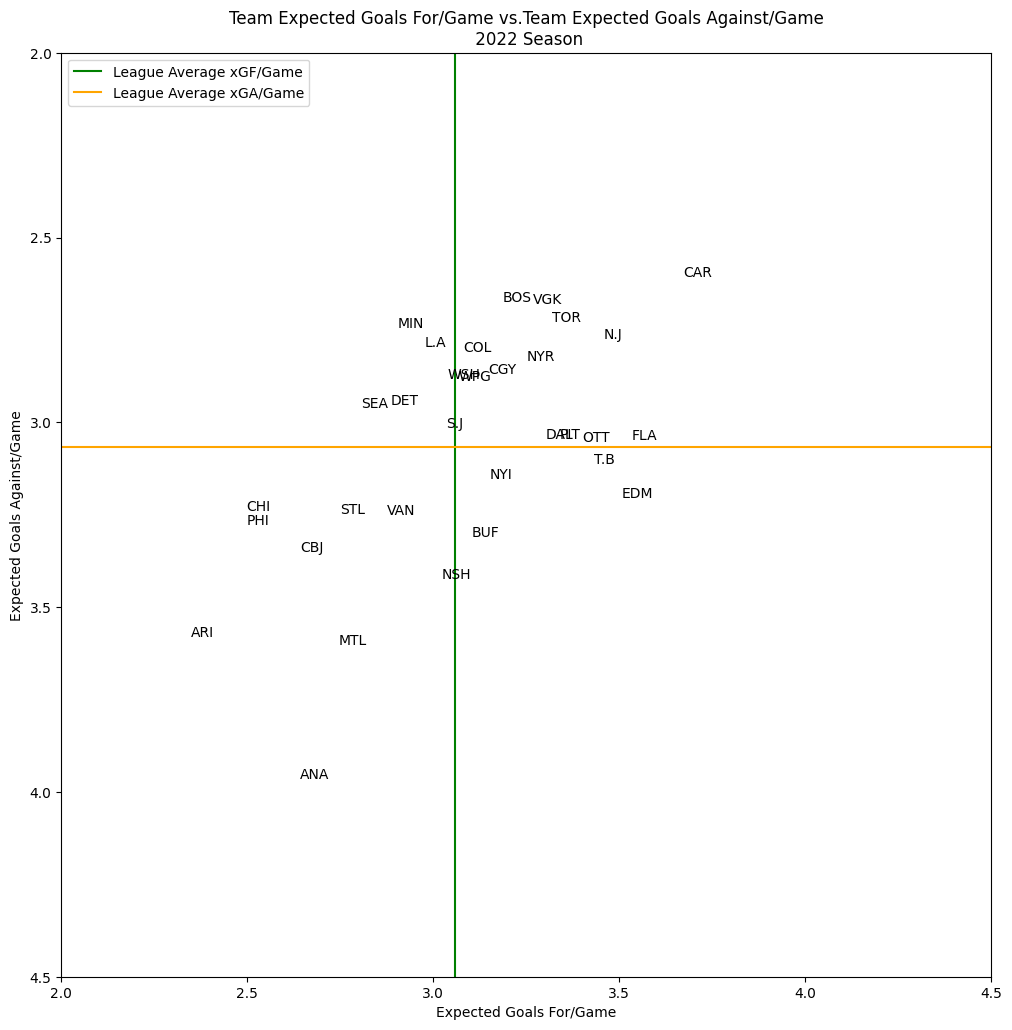

In [6]:
#Loop through each season and plot the xG vs. G per game and a trendline
seasons = [2022]
for season in seasons:
    seasons_shots = shots_2022
    #seasons_shots = shots_dec
    #Write loop to calculate each teams xG vs. G
    total_xGoalsF = []
    total_xGoalsA = []
    teams = seasons_shots['Ev_Team'].value_counts()
    teams = dict(teams)
    teams_list = list(teams.keys())
    for team in teams.keys():
        games_played = seasons_shots[(seasons_shots['Ev_Team']==team)]
        team_games_played=len(games_played['Game_Id'].value_counts())
        shots_for = seasons_shots[(seasons_shots['Ev_Team']==team)]
        shots_against = seasons_shots[(seasons_shots['teamCodeAgainst']==team)]
        team_total_xGF = (shots_for['xG'].sum()/team_games_played)
        team_total_xGA = (shots_against['xG'].sum()/team_games_played)
        total_xGoalsF.append(team_total_xGF)
        total_xGoalsA.append(team_total_xGA)
    total_xGF_all = sum(total_xGoalsF)/len(teams_list)
    total_xGA_all = sum(total_xGoalsA)/len(teams_list)
    plt.figure(figsize=(12,12))
    plt.ylim([2,4.5])
    plt.gca().invert_yaxis()
    plt.scatter(total_xGoalsF, total_xGoalsA,color='w')
    for i in range (0,len(total_xGoalsF)):
        plt.text(total_xGoalsF[i],total_xGoalsA[i],teams_list[i])
    a = plt.axvline(x = total_xGF_all, color = 'green', label = 'League Average xGF/Game')
    b = plt.axhline(y = total_xGA_all, color = 'orange', linestyle = '-', label = "League Average xGA/Game")
    plt.legend([a,b],["League Average xGF/Game",'League Average xGA/Game'], loc='upper left')
    plt.title("Team Expected Goals For/Game vs.Team Expected Goals Against/Game\n 2022 Season")
    plt.xlabel('Expected Goals For/Game')
    plt.ylabel('Expected Goals Against/Game')
    plt.xlim([2,4.5])
    plt.show()

In [9]:
game = shots[(shots['Date']=='2023-01-07') & (shots['Home_Team']=="OTT")]
game

,index,Period,distanceFromLast,isHomeTeam,isRebound,isRush,lastEvent_Faceoff,lastEvent_OpponentGive,lastEvent_OpponentHit,lastEvent_OpponentMiss,...,gameSeconds,p1_name,p1_ID,p2_name,p2_ID,p3_name,p3_ID,Type,Description,teamCodeAgainst
1308363,1200,1,61.188234,1,0,0,1,0,0,0,...,73.0,PARKER KELLY,8480448.0,NaN,NaN,NaN,NaN,WRIST SHOT,"OTT ONGOAL - #45 KELLY, Wrist, Off. Zone, 31 ft.",SEA
1308364,1208,1,60.901560,1,0,0,1,0,0,0,...,201.0,JAKE SANDERSON,8482105.0,NaN,NaN,NaN,NaN,WRIST SHOT,"OTT ONGOAL - #85 SANDERSON, Wrist, Off. Zone, ...",SEA
1308365,1213,1,49.517674,1,0,0,0,1,0,0,...,309.0,TRAVIS HAMONIC,8474612.0,NaN,NaN,NaN,NaN,WRIST SHOT,"OTT ONGOAL - #23 HAMONIC, Wrist, Off. Zone, 46...",SEA
1308366,1217,1,58.034473,0,0,0,0,0,1,0,...,328.0,VINCE DUNN,8478407.0,NaN,NaN,NaN,NaN,SLAP SHOT,"SEA ONGOAL - #29 DUNN, Slap, Off. Zone, 59 ft.",OTT
1308367,1230,1,46.690470,0,0,0,0,0,1,0,...,456.0,DANIEL SPRONG,8478466.0,NaN,NaN,NaN,NaN,WRIST SHOT,"SEA #91 SPRONG, Wrist, Wide of Net, Off. Zone,...",OTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308425,1498,3,3.162278,1,0,0,0,0,0,0,...,3252.0,DERICK BRASSARD,8473544.0,NaN,NaN,NaN,NaN,WRIST SHOT,"OTT ONGOAL - #61 BRASSARD, Wrist, Off. Zone, 1...",SEA
1308426,1504,3,6.324555,1,0,0,0,0,0,0,...,3288.0,ALEX DEBRINCAT,8479337.0,NaN,NaN,NaN,NaN,SNAP SHOT,"OTT #12 DEBRINCAT, Snap, Over Net, Off. Zone, ...",SEA
1308427,1505,3,37.107951,1,1,0,0,0,0,0,...,3291.0,MARK KASTELIC,8480355.0,NaN,NaN,NaN,NaN,WRIST SHOT,"OTT ONGOAL - #47 KASTELIC, Wrist, Off. Zone, 7...",SEA
1308428,1508,3,49.979996,1,0,0,1,0,0,0,...,3296.0,ARTEM ZUB,8482245.0,NaN,NaN,NaN,NaN,WRIST SHOT,"OTT ONGOAL - #2 ZUB, Wrist, Off. Zone, 44 ft.",SEA


In [10]:
game.to_csv("sea_ott_game.csv")

In [28]:
player_name = 'TREVOR ZEGRAS'
player = game[(game['homePlayer1'] == player_name) | (game['homePlayer2'] == player_name) | (game['homePlayer3'] == player_name)|(game['homePlayer4'] == player_name)|(game['homePlayer5'] == player_name) | (game['homePlayer6'] ==player_name)]
player

,index,Period,distanceFromLast,isHomeTeam,isRebound,isRush,lastEvent_Faceoff,lastEvent_OpponentGive,lastEvent_OpponentHit,lastEvent_OpponentMiss,...,gameSeconds,p1_name,p1_ID,p2_name,p2_ID,p3_name,p3_ID,Type,Description,teamCodeAgainst
1307899,1430,1,170.061753,0,0,1,0,1,0,0,...,36.0,ALEXANDER BARABANOV,8482222.0,NaN,NaN,NaN,NaN,TIP-IN,"SJS ONGOAL - #94 BARABANOV, Tip-In, Off. Zone,...",ANA
1307900,1431,1,3.162278,0,1,0,0,0,0,0,...,38.0,MATT NIETO,8476442.0,ALEXANDER BARABANOV,8482222.0,MARC-EDOUARD VLASIC,8471709.0,TIP-IN,"SJS #83 NIETO(7), Tip-In, Off. Zone, 6 ft.Assi...",ANA
1307917,1477,1,22.203603,1,0,0,1,0,0,0,...,380.0,TREVOR ZEGRAS,8481533.0,NaN,NaN,NaN,NaN,WRIST SHOT,"ANA #11 ZEGRAS, Wrist, Wide of Net, Off. Zone,...",S.J
1307918,1478,1,10.816654,1,0,0,0,0,0,0,...,398.0,TREVOR ZEGRAS,8481533.0,JOHN KLINGBERG,8475906.0,FRANK VATRANO,8478366.0,WRIST SHOT,"ANA #11 ZEGRAS(11), Wrist, Off. Zone, 15 ft.As...",S.J
1307919,1482,1,28.284271,0,0,0,0,1,0,0,...,425.0,KEVIN LABANC,8478099.0,NaN,NaN,NaN,NaN,WRIST SHOT,"SJS #62 LABANC, Wrist, Wide of Net, Off. Zone,...",ANA
1307920,1483,1,38.327536,0,1,0,0,0,0,0,...,427.0,TIMO MEIER,8478414.0,NaN,NaN,NaN,NaN,WRIST SHOT,"SJS ONGOAL - #28 MEIER, Wrist, Off. Zone, 8 ft.",ANA
1307921,1486,1,24.596748,1,0,0,1,0,0,0,...,441.0,TROY TERRY,8478873.0,NaN,NaN,NaN,NaN,TIP-IN,"ANA #19 TERRY, Tip-In, Wide of Net, Off. Zone,...",S.J
1307922,1487,1,45.276926,1,1,0,0,0,0,0,...,443.0,CAM FOWLER,8475764.0,NaN,NaN,NaN,NaN,WRIST SHOT,"ANA ONGOAL - #4 FOWLER, Wrist, Off. Zone, 53 ft.",S.J
1307923,1488,1,40.311289,1,0,0,0,0,0,0,...,450.0,TROY TERRY,8478873.0,NaN,NaN,NaN,NaN,DEFLECTED,"ANA #19 TERRY, Deflected, Wide of Net, Off. Zo...",S.J
1307927,1506,1,68.949257,1,0,0,0,0,1,0,...,672.0,ADAM HENRIQUE,8474641.0,NaN,NaN,NaN,NaN,SNAP SHOT,"ANA #14 HENRIQUE, Snap, Wide of Net, Off. Zone...",S.J


In [29]:
player_for = player[(player['isHomeTeam']==1) & (player['Strength_Mapped']=='even')]
player_for

,index,Period,distanceFromLast,isHomeTeam,isRebound,isRush,lastEvent_Faceoff,lastEvent_OpponentGive,lastEvent_OpponentHit,lastEvent_OpponentMiss,...,gameSeconds,p1_name,p1_ID,p2_name,p2_ID,p3_name,p3_ID,Type,Description,teamCodeAgainst
1307917,1477,1,22.203603,1,0,0,1,0,0,0,...,380.0,TREVOR ZEGRAS,8481533.0,NaN,NaN,NaN,NaN,WRIST SHOT,"ANA #11 ZEGRAS, Wrist, Wide of Net, Off. Zone,...",S.J
1307918,1478,1,10.816654,1,0,0,0,0,0,0,...,398.0,TREVOR ZEGRAS,8481533.0,JOHN KLINGBERG,8475906.0,FRANK VATRANO,8478366.0,WRIST SHOT,"ANA #11 ZEGRAS(11), Wrist, Off. Zone, 15 ft.As...",S.J
1307930,1518,1,97.082439,1,0,0,0,0,0,0,...,823.0,JOHN KLINGBERG,8475906.0,NaN,NaN,NaN,NaN,WRIST SHOT,"ANA ONGOAL - #3 KLINGBERG, Wrist, Off. Zone, 3...",S.J
1307935,1531,1,112.445542,1,0,0,0,1,0,0,...,1037.0,TREVOR ZEGRAS,8481533.0,NaN,NaN,NaN,NaN,BACKHAND,"ANA #11 ZEGRAS, Backhand, Wide of Net, Off. Zo...",S.J
1307936,1532,1,43.046487,1,0,0,0,0,0,0,...,1065.0,COLTON WHITE,8478841.0,NaN,NaN,NaN,NaN,SNAP SHOT,"ANA ONGOAL - #45 WHITE, Snap, Off. Zone, 56 ft.",S.J
1307944,1561,2,31.016125,1,0,0,0,0,0,0,...,1384.0,JOHN KLINGBERG,8475906.0,NaN,NaN,NaN,NaN,WRIST SHOT,"ANA #3 KLINGBERG, Wrist, Wide of Net, Off. Zon...",S.J
1307945,1564,2,23.769729,1,0,0,1,0,0,0,...,1414.0,CAM FOWLER,8475764.0,NaN,NaN,NaN,NaN,SLAP SHOT,"ANA ONGOAL - #4 FOWLER, Slap, Off. Zone, 52 ft.",S.J
1307946,1565,2,35.608988,1,0,0,0,0,0,0,...,1418.0,TREVOR ZEGRAS,8481533.0,NaN,NaN,NaN,NaN,BACKHAND,"ANA #11 ZEGRAS, Backhand, Wide of Net, Off. Zo...",S.J
1307951,1582,2,144.222051,1,0,0,0,0,0,0,...,1639.0,FRANK VATRANO,8478366.0,NaN,NaN,NaN,NaN,SLAP SHOT,"ANA ONGOAL - #77 VATRANO, Slap, Off. Zone, 28 ft.",S.J
1307967,1619,2,157.000000,1,0,0,0,0,0,0,...,2035.0,FRANK VATRANO,8478366.0,NaN,NaN,NaN,NaN,TIP-IN,"ANA #77 VATRANO, Tip-In, Over Net, Off. Zone, ...",S.J


In [30]:
player_against = player[player['isHomeTeam']==0 & (player['Strength_Mapped']=='even')]
player_against

,index,Period,distanceFromLast,isHomeTeam,isRebound,isRush,lastEvent_Faceoff,lastEvent_OpponentGive,lastEvent_OpponentHit,lastEvent_OpponentMiss,...,gameSeconds,p1_name,p1_ID,p2_name,p2_ID,p3_name,p3_ID,Type,Description,teamCodeAgainst
1307899,1430,1,170.061753,0,0,1,0,1,0,0,...,36.0,ALEXANDER BARABANOV,8482222.0,NaN,NaN,NaN,NaN,TIP-IN,"SJS ONGOAL - #94 BARABANOV, Tip-In, Off. Zone,...",ANA
1307900,1431,1,3.162278,0,1,0,0,0,0,0,...,38.0,MATT NIETO,8476442.0,ALEXANDER BARABANOV,8482222.0,MARC-EDOUARD VLASIC,8471709.0,TIP-IN,"SJS #83 NIETO(7), Tip-In, Off. Zone, 6 ft.Assi...",ANA
1307919,1482,1,28.284271,0,0,0,0,1,0,0,...,425.0,KEVIN LABANC,8478099.0,NaN,NaN,NaN,NaN,WRIST SHOT,"SJS #62 LABANC, Wrist, Wide of Net, Off. Zone,...",ANA
1307920,1483,1,38.327536,0,1,0,0,0,0,0,...,427.0,TIMO MEIER,8478414.0,NaN,NaN,NaN,NaN,WRIST SHOT,"SJS ONGOAL - #28 MEIER, Wrist, Off. Zone, 8 ft.",ANA
1307938,1550,2,19.235384,0,0,0,0,0,1,0,...,1263.0,TIMO MEIER,8478414.0,NaN,NaN,NaN,NaN,WRIST SHOT,"SJS ONGOAL - #28 MEIER, Wrist, Off. Zone, 9 ft.",ANA
1307939,1551,2,4.123106,0,1,0,0,0,0,0,...,1265.0,TIMO MEIER,8478414.0,NaN,NaN,NaN,NaN,TIP-IN,"SJS ONGOAL - #28 MEIER, Tip-In, Off. Zone, 5 ft.",ANA
1307949,1579,2,30.463092,0,0,0,0,0,0,0,...,1624.0,TIMO MEIER,8478414.0,NaN,NaN,NaN,NaN,TIP-IN,"SJS ONGOAL - #28 MEIER, Tip-In, Off. Zone, 10 ft.",ANA
1307950,1581,2,14.317821,0,0,0,0,0,0,0,...,1627.0,TIMO MEIER,8478414.0,NaN,NaN,NaN,NaN,TIP-IN,"SJS ONGOAL - #28 MEIER, Tip-In, Off. Zone, 7 ft.",ANA
1307952,1584,2,83.761566,0,0,1,0,0,1,0,...,1650.0,SCOTT HARRINGTON,8476449.0,NaN,NaN,NaN,NaN,BACKHAND,"SJS ONGOAL - #4 HARRINGTON, Backhand, Off. Zon...",ANA
1307957,1602,2,62.008064,0,0,0,0,0,0,0,...,1857.0,MARC-EDOUARD VLASIC,8471709.0,NaN,NaN,NaN,NaN,SNAP SHOT,"SJS #44 VLASIC, Snap, Wide of Net, Off. Zone, ...",ANA


In [31]:
away_team_xg = round(player_for['xG'].sum(),3)
home_team_xg = round(player_against['xG'].sum(),3)
away_team_xg/(home_team_xg + away_team_xg)
home_team_xg/(home_team_xg + away_team_xg)

0.7495599698265024

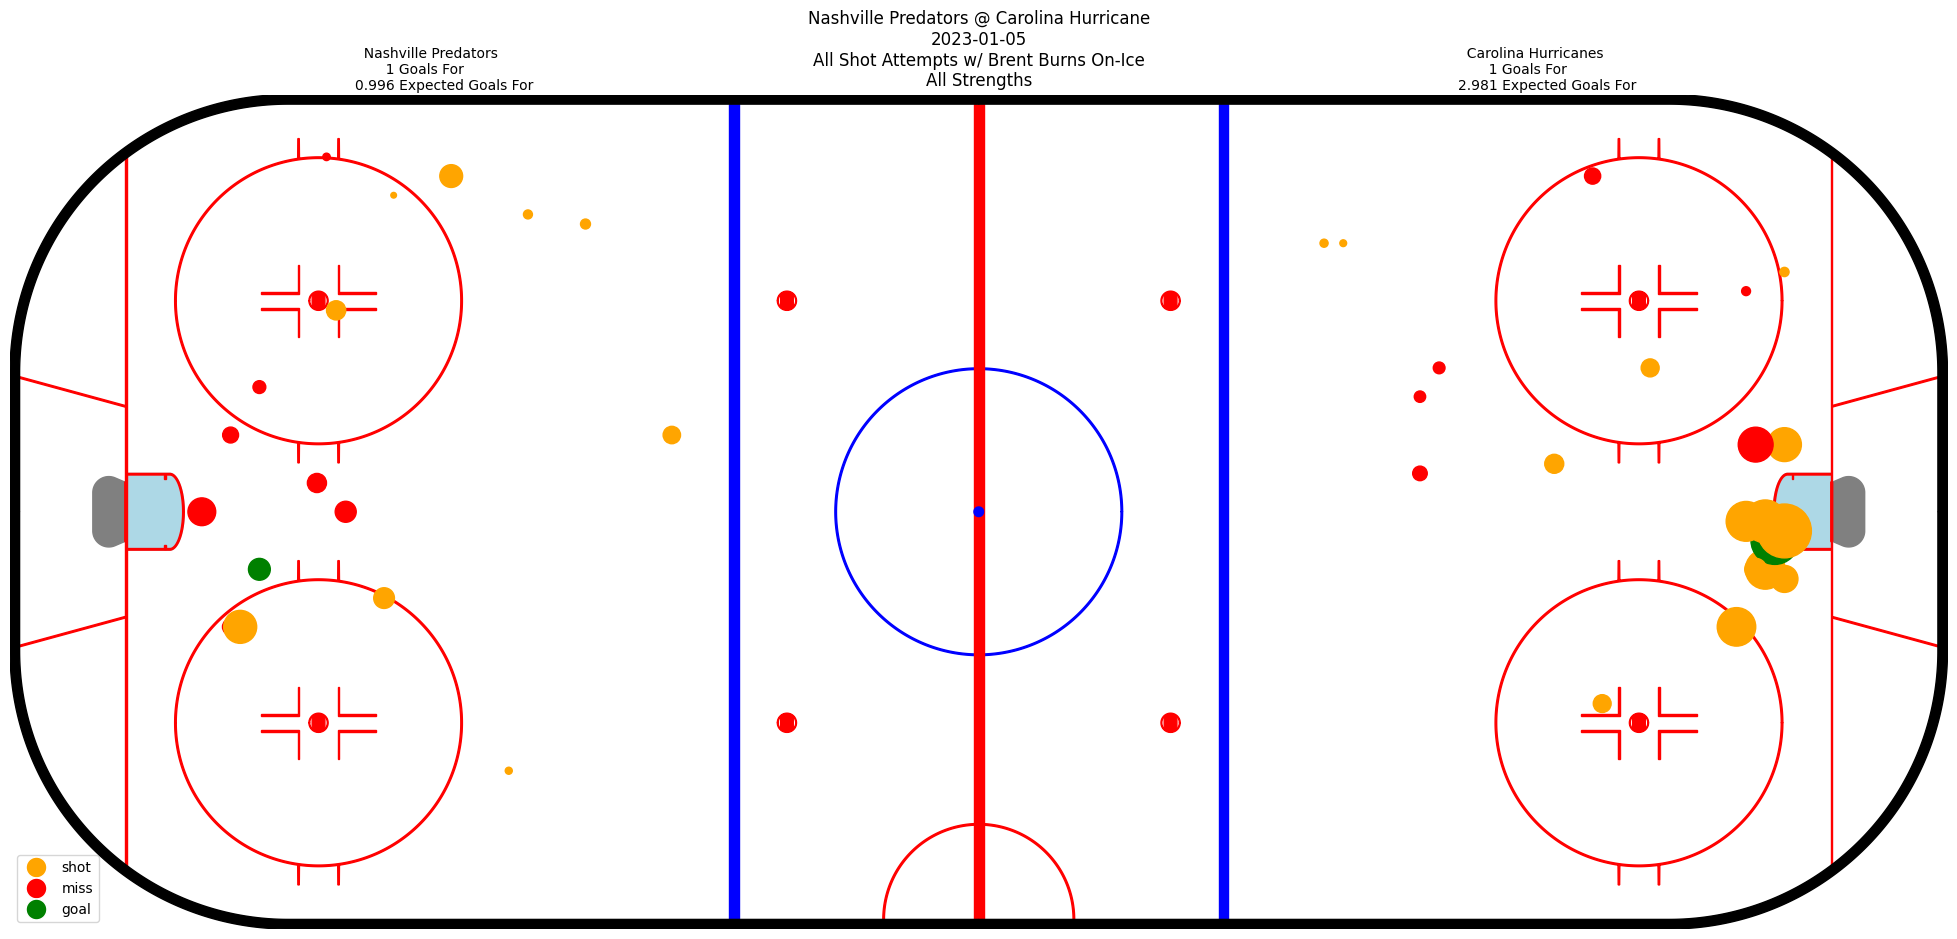

In [32]:
#Plot both teams even stregth shots
from hockey_rink import NHLRink
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
nhl_rink = NHLRink(rotation=90)
fig=plt.figure(figsize=(25,25))
plt.xlim([0,100])
plt.ylim([-42.5, 42.5])
rink = NHLRink()
rink.draw()
plt.scatter((player_for['xCordAdjusted']*-1),(player_for['yCordAdjusted']*-1), (player_for['xG']*3000) ,c= np.where((player_for['Event']=="GOAL"),'green',np.where((player_for['Event']=="SHOT"),'orange','red')),zorder=10)
plt.scatter((player_against['xCordAdjusted']),(player_against['yCordAdjusted']), (player_against['xG']*3000) ,c= np.where((player_against['Event']=="GOAL"),'green',np.where((player_against['Event']=="SHOT"),'orange','red')),zorder=10)         
'''
plt.scatter(h,hsyc,adj_hsxg,marker='o',color='#fcbd4e')
plt.scatter(hmxc,hmyc,adj_hmxg,marker='o',color='#c42b00')
plt.scatter(hgxc,hgyc,adj_hgxg,marker='o',color='#008f39')
'''
custom_points = [Line2D([0], [0], marker='o', color='w', label='shot', markerfacecolor='orange', markersize=15),
                Line2D([0], [0], marker='o', color='w', label='miss', markerfacecolor='red', markersize=15),
                Line2D([0], [0], marker='o', color='w', label='goal', markerfacecolor='green', markersize=15)]
'''
plt.scatter(adj_asxc,adj_asyc,adj_asxg,marker='o',color='#fcbd4e', label='shot')
plt.scatter(adj_amxc,adj_amyc,adj_amxg,marker='o',color='#c42b00', label='miss')
plt.scatter(adj_agxc,adj_agyc,adj_agxg,marker='o',color='#008f39', label='goal')
'''
away_team_goals = player_for['goal'].sum()
home_team_goals = player_against['goal'].sum()
plt.title("Nashville Predators @ Carolina Hurricane\n2023-01-05\nAll Shot Attempts w/ Brent Burns On-Ice\nAll Strengths")
plt.text(-65,44,'  Nashville Predators\n       '+str(away_team_goals) + " Goals For\n"+ str(away_team_xg) + " Expected Goals For")
plt.text(50,44,'  Carolina Hurricanes\n       '+str(home_team_goals) + " Goals For\n"+ str(home_team_xg) + " Expected Goals For")
plt.legend(handles=custom_points,loc='lower left')

In [ ]:
shots[shots['Date']=='2022-12-01']

,index,Period,distanceFromLast,isHomeTeam,isRebound,isRush,lastEvent_Faceoff,lastEvent_OpponentGive,lastEvent_OpponentHit,lastEvent_OpponentMiss,...,gameSeconds,p1_name,p1_ID,p2_name,p2_ID,p3_name,p3_ID,Type,Description,teamCodeAgainst
1285849,1285849,1,47.042534,1,0,0,1,0,0,0,...,16.0,TAGE THOMPSON,8479420.0,NaN,NaN,NaN,NaN,WRIST SHOT,"BUF ONGOAL - #72 THOMPSON, Wrist, Off. Zone, 4...",COL
1285850,1285850,1,30.066593,1,0,0,0,0,0,0,...,27.0,ALEX TUCH,8477949.0,NaN,NaN,NaN,NaN,WRIST SHOT,"BUF #89 TUCH, Wrist, Wide of Net, Off. Zone, 3...",COL
1285851,1285851,1,2.000000,1,0,0,0,0,0,0,...,94.0,JACK QUINN,8482097.0,NaN,NaN,NaN,NaN,WRIST SHOT,"BUF #22 QUINN, Wrist, Wide of Net, Off. Zone, ...",COL
1285852,1285852,1,29.068884,1,0,0,1,0,0,0,...,172.0,VICTOR OLOFSSON,8478109.0,NaN,NaN,NaN,NaN,SLAP SHOT,"BUF #71 OLOFSSON, Slap, Goalpost, Off. Zone, 5...",COL
1285853,1285853,1,157.165518,1,0,0,0,0,0,0,...,281.0,TAGE THOMPSON,8479420.0,NaN,NaN,NaN,NaN,WRIST SHOT,"BUF ONGOAL - #72 THOMPSON, Wrist, Off. Zone, 2...",COL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286758,1286758,3,43.931765,0,0,0,0,0,0,0,...,3296.0,NICK SCHMALTZ,8477951.0,NaN,NaN,NaN,NaN,TIP-IN,"ARI #8 SCHMALTZ, Tip-In, Wide of Net, Off. Zon...",L.A
1286759,1286759,3,10.630146,0,0,0,0,0,0,0,...,3356.0,J.J. MOSER,8482655.0,NaN,NaN,NaN,NaN,WRIST SHOT,"ARI #90 MOSER, Wrist, Wide of Net, Off. Zone, ...",L.A
1286760,1286760,3,12.165525,0,1,0,0,0,0,0,...,3359.0,JACK MCBAIN,8480855.0,NaN,NaN,NaN,NaN,TIP-IN,"ARI #22 MCBAIN, Tip-In, Wide of Net, Off. Zone...",L.A
1286761,1286761,3,144.734239,1,0,0,1,0,0,0,...,3440.0,KEVIN FIALA,8477942.0,NaN,NaN,NaN,NaN,BACKHAND,"LAK #22 FIALA, Backhand, Goalpost, Off. Zone, ...",ARI


In [ ]:
dec_shots = shots[1285849:1304817]
dec_shots

,index,Period,distanceFromLast,isHomeTeam,isRebound,isRush,lastEvent_Faceoff,lastEvent_OpponentGive,lastEvent_OpponentHit,lastEvent_OpponentMiss,...,gameSeconds,p1_name,p1_ID,p2_name,p2_ID,p3_name,p3_ID,Type,Description,teamCodeAgainst
1285849,1285849,1,47.042534,1,0,0,1,0,0,0,...,16.0,TAGE THOMPSON,8479420.0,NaN,NaN,NaN,NaN,WRIST SHOT,"BUF ONGOAL - #72 THOMPSON, Wrist, Off. Zone, 4...",COL
1285850,1285850,1,30.066593,1,0,0,0,0,0,0,...,27.0,ALEX TUCH,8477949.0,NaN,NaN,NaN,NaN,WRIST SHOT,"BUF #89 TUCH, Wrist, Wide of Net, Off. Zone, 3...",COL
1285851,1285851,1,2.000000,1,0,0,0,0,0,0,...,94.0,JACK QUINN,8482097.0,NaN,NaN,NaN,NaN,WRIST SHOT,"BUF #22 QUINN, Wrist, Wide of Net, Off. Zone, ...",COL
1285852,1285852,1,29.068884,1,0,0,1,0,0,0,...,172.0,VICTOR OLOFSSON,8478109.0,NaN,NaN,NaN,NaN,SLAP SHOT,"BUF #71 OLOFSSON, Slap, Goalpost, Off. Zone, 5...",COL
1285853,1285853,1,157.165518,1,0,0,0,0,0,0,...,281.0,TAGE THOMPSON,8479420.0,NaN,NaN,NaN,NaN,WRIST SHOT,"BUF ONGOAL - #72 THOMPSON, Wrist, Off. Zone, 2...",COL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304812,1304812,3,46.486557,0,0,0,0,1,0,0,...,3414.0,MARK SCHEIFELE,8476460.0,NaN,NaN,NaN,NaN,SNAP SHOT,"WPG ONGOAL - #55 SCHEIFELE, Snap, Off. Zone, 2...",EDM
1304813,1304813,3,45.398238,0,0,0,1,0,0,0,...,3428.0,PIERRE-LUC DUBOIS,8479400.0,NaN,NaN,NaN,NaN,WRIST SHOT,"WPG #80 DUBOIS, Wrist, Wide of Net, Off. Zone,...",EDM
1304814,1304814,3,30.016662,1,0,0,0,0,0,0,...,3476.0,TYSON BARRIE,8475197.0,NaN,NaN,NaN,NaN,SLAP SHOT,"EDM ONGOAL - #22 BARRIE, Slap, Off. Zone, 61 ft.",WPG
1304815,1304815,3,16.124515,1,0,0,1,0,0,0,...,3508.0,RYAN NUGENT-HOPKINS,8476454.0,NaN,NaN,NaN,NaN,SNAP SHOT,"EDM ONGOAL - #93 NUGENT-HOPKINS, Snap, Off. Zo...",WPG


CGY 16
WPG 16
L.A 15
COL 15
WSH 15
BOS 14
VGK 15
MIN 15
DAL 14
OTT 14
FLA 14
NSH 14
CAR 13
N.J 13
T.B 13
STL 15
CBJ 14
NYI 13
EDM 14
TOR 12
PHI 14
NYR 13
PIT 13
VAN 13
MTL 15
SEA 12
ANA 14
ARI 15
DET 13
S.J 12
CHI 13
BUF 11


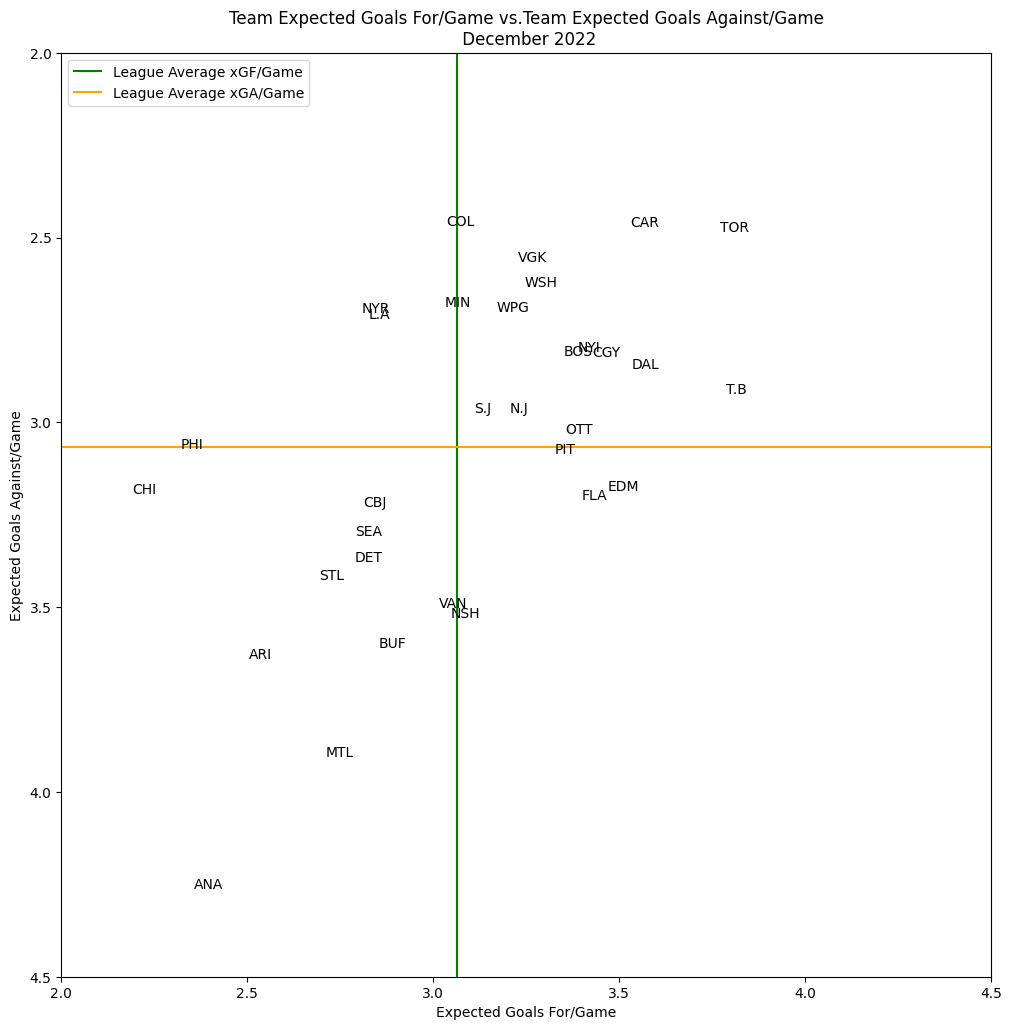

In [26]:
seasons_shots = dec_shots
#seasons_shots = shots_dec
#Write loop to calculate each teams xG vs. G
total_xGoalsF = []
total_xGoalsA = []
teams = seasons_shots['Ev_Team'].value_counts()
teams = dict(teams)
teams_list = list(teams.keys())
for team in teams.keys():
    games_played = seasons_shots[(seasons_shots['Ev_Team']==team)]
    team_games_played=len(games_played['Game_Id'].value_counts())
    print(team,team_games_played)
    shots_for = seasons_shots[(seasons_shots['Ev_Team']==team)]
    shots_against = seasons_shots[(seasons_shots['teamCodeAgainst']==team)]
    team_total_xGF = (shots_for['xG'].sum()/team_games_played)
    team_total_xGA = (shots_against['xG'].sum()/team_games_played)
    total_xGoalsF.append(team_total_xGF)
    total_xGoalsA.append(team_total_xGA)
total_xGF_all = sum(total_xGoalsF)/len(teams_list)
total_xGA_all = sum(total_xGoalsA)/len(teams_list)
plt.figure(figsize=(12,12))
plt.ylim([2,4.5])
plt.gca().invert_yaxis()
plt.scatter(total_xGoalsF, total_xGoalsA,color='w')
for i in range (0,len(total_xGoalsF)):
    plt.text(total_xGoalsF[i],total_xGoalsA[i],teams_list[i])
a = plt.axvline(x = total_xGF_all, color = 'green', label = 'League Average xGF/Game')
b = plt.axhline(y = total_xGA_all, color = 'orange', linestyle = '-', label = "League Average xGA/Game")
plt.legend([a,b],["League Average xGF/Game",'League Average xGA/Game'], loc='upper left')
plt.title("Team Expected Goals For/Game vs.Team Expected Goals Against/Game\n December 2022")
plt.xlabel('Expected Goals For/Game')
plt.ylabel('Expected Goals Against/Game')
plt.xlim([2,4.5])
plt.show()

In [245]:
nov_shots = shots[1267220:1285849]

FLA 14
CAR 14
OTT 14
CGY 15
N.J 14
S.J 15
WSH 14
NYR 14
EDM 14
DAL 14
L.A 14
BUF 14
NYI 15
PHI 15
TOR 15
ANA 14
VGK 14
PIT 14
VAN 14
STL 14
BOS 13
T.B 13
DET 13
MTL 13
WPG 12
NSH 12
COL 11
MIN 12
CHI 13
SEA 12
CBJ 11
ARI 12


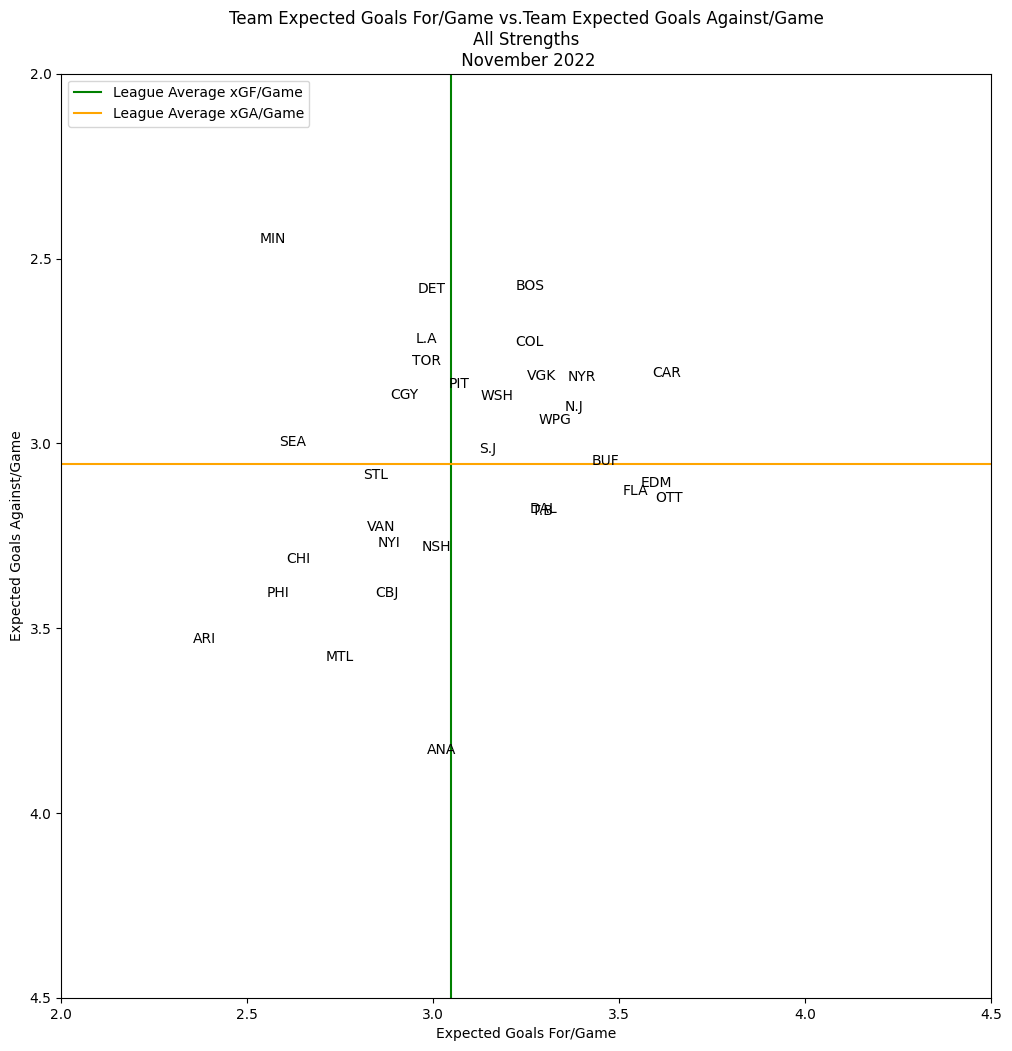

In [246]:
seasons_shots = nov_shots
#seasons_shots = shots_dec
#Write loop to calculate each teams xG vs. G
total_xGoalsF = []
total_xGoalsA = []
teams = seasons_shots['Ev_Team'].value_counts()
teams = dict(teams)
teams_list = list(teams.keys())
for team in teams.keys():
    games_played = seasons_shots[(seasons_shots['Ev_Team']==team)]
    team_games_played=len(games_played['Game_Id'].value_counts())
    print(team,team_games_played)
    shots_for = seasons_shots[(seasons_shots['Ev_Team']==team)]
    shots_against = seasons_shots[(seasons_shots['teamCodeAgainst']==team)]
    team_total_xGF = (shots_for['xG'].sum()/team_games_played)
    team_total_xGA = (shots_against['xG'].sum()/team_games_played)
    total_xGoalsF.append(team_total_xGF)
    total_xGoalsA.append(team_total_xGA)
total_xGF_all = sum(total_xGoalsF)/len(teams_list)
total_xGA_all = sum(total_xGoalsA)/len(teams_list)
plt.figure(figsize=(12,12))
plt.ylim([2,4.5])
plt.gca().invert_yaxis()
plt.scatter(total_xGoalsF, total_xGoalsA,color='w')
for i in range (0,len(total_xGoalsF)):
    plt.text(total_xGoalsF[i],total_xGoalsA[i],teams_list[i])
a = plt.axvline(x = total_xGF_all, color = 'green', label = 'League Average xGF/Game')
b = plt.axhline(y = total_xGA_all, color = 'orange', linestyle = '-', label = "League Average xGA/Game")
plt.legend([a,b],["League Average xGF/Game",'League Average xGA/Game'], loc='upper left')
plt.title("Team Expected Goals For/Game vs.Team Expected Goals Against/Game\nAll Strengths\n November 2022")
plt.xlabel('Expected Goals For/Game')
plt.ylabel('Expected Goals Against/Game')
plt.xlim([2,4.5])
plt.show()

In [33]:
nyi_games = shots_2022[(shots_2022['Home_Team'] == "NYI") | (shots_2022['Away_Team'] == "NYI")]
nyi_game_codes = nyi_games['Game_Id'].value_counts().keys()
nyi_games.columns

Index(['index', 'Period', 'distanceFromLast', 'isHomeTeam', 'isRebound',
       'isRush', 'lastEvent_Faceoff', 'lastEvent_OpponentGive',
       'lastEvent_OpponentHit', 'lastEvent_OpponentMiss',
       'lastEvent_OpponentShot', 'lastEvent_OpponentTake',
       'lastEvent_SameTeamGive', 'lastEvent_SameTeamHit',
       'lastEvent_SameTeamMiss', 'lastEvent_SameTeamShot',
       'lastEvent_SameTeamTake', 'lastEventxCordAdjusted',
       'lastEventyCordAdjusted', 'shotAngle', 'shotDistance',
       'shotType_Backhand', 'shotType_Deflected', 'shotType_Slap',
       'shotType_Snap', 'shotType_Tip', 'shotType_Wrap', 'shotType_Wrist',
       'strength_Advantage', 'strength_Even', 'strength_Short_Handed',
       'timeSinceLastEvent', 'xCordAdjusted', 'yCordAdjusted', 'xG', 'Game_Id',
       'Date', 'Event', 'goal', 'Home_Team', 'Away_Team', 'Ev_Team',
       'Away_Players', 'Home_Players', 'Home_Score', 'Away_Score',
       'Strength_Mapped', 'homeSkatersOnIce', 'awaySkatersOnIce',
       'awayP

In [34]:
nyi_players_df = nyi_games[nyi_games['Ev_Team']=="NYI"]['p1_name']
nyi_players = nyi_players_df.value_counts().keys()

In [35]:
islanders_xg = pd.DataFrame(columns=['name','xGF','xGA','xGF%'])
i = 0
for player in nyi_players:
    player_name = player
    player_events = nyi_games[(nyi_games['awayPlayer1'] == player_name) | (nyi_games['awayPlayer2'] == player_name) | (nyi_games['awayPlayer3'] == player_name)|(nyi_games['awayPlayer4'] == player_name)|(nyi_games['awayPlayer5'] == player_name) | (nyi_games['awayPlayer6'] ==player_name) | 
                             (nyi_games['homePlayer1'] == player_name) | (nyi_games['homePlayer2'] == player_name) | (nyi_games['homePlayer3'] == player_name)|(nyi_games['homePlayer4'] == player_name)|(nyi_games['homePlayer5'] == player_name) | (nyi_games['homePlayer6'] ==player_name)]
    player_for = player_events[(player_events['Ev_Team']=="NYI") & (player_events['homeSkatersOnIce']==5)  & (player_events['awaySkatersOnIce']==5)]
    player_against = player_events[(player_events['Ev_Team']!="NYI") & (player_events['homeSkatersOnIce']==5)  & (player_events['awaySkatersOnIce']==5)]
    xg_for = player_for['xG'].sum()
    xg_against = player_against['xG'].sum()
    total = xg_for+xg_against
    xGF_percent = xg_for/total
    islanders_xg = islanders_xg.append({'name':player,'xGF':xg_for,'xGA':xg_against,'xGF%':xGF_percent},ignore_index=True)
    i+=1
islanders_xg['name'] = islanders_xg['name'].str.upper()
islanders_xg = islanders_xg.sort_values(by=['name'])
islanders_xg

,name,xGF,xGA,xGF%
20,AATU RATY,1.853104,1.679915,0.524510
15,ADAM PELECH,20.347193,21.170572,0.490084
10,ALEXANDER ROMANOV,30.405669,35.809281,0.459196
1,ANDERS LEE,29.921224,24.064332,0.554245
5,ANTHONY BEAUVILLIER,23.658206,24.486705,0.491396
2,BROCK NELSON,26.917491,27.095093,0.498356
17,CAL CLUTTERBUCK,9.079741,13.408520,0.403755
14,CASEY CIZIKAS,15.472109,21.838731,0.414681
25,COLE BARDREAU,0.135889,0.000000,1.000000
18,HUDSON FASCHING,8.032887,7.741042,0.509251


In [36]:
toi = pd.read_csv("nyi_5v5_toi.csv")
toi = toi[['Player','TOI']]
toi['Player'] = toi['Player'].str.upper()
toi = toi.drop(12)
toi = toi.reset_index()
toi = toi.rename(columns={'Player':'name'})
toi = toi.drop(columns=['index'])
toi

,name,TOI
0,ALEXANDER ROMANOV,677.650000
1,NOAH DOBSON,603.616667
2,RYAN PULOCK,648.283333
3,MATHEW BARZAL,547.300000
4,SCOTT MAYFIELD,643.933333
5,ANDERS LEE,507.066667
6,BROCK NELSON,526.450000
7,SEBASTIAN AHO,518.433333
8,ANTHONY BEAUVILLIER,477.650000
9,ZACH PARISE,471.616667


In [37]:
#join the two
islanders_data = toi.set_index('name').join(islanders_xg.set_index('name'),on='name',how='left')
islanders_data = islanders_data.reset_index()
islanders_data

,name,TOI,xGF,xGA,xGF%
0,ALEXANDER ROMANOV,677.650000,30.405669,35.809281,0.459196
1,NOAH DOBSON,603.616667,28.008507,32.585697,0.462231
2,RYAN PULOCK,648.283333,32.064249,32.140901,0.499403
3,MATHEW BARZAL,547.300000,26.257284,23.470693,0.528018
4,SCOTT MAYFIELD,643.933333,30.083815,28.089125,0.517144
5,ANDERS LEE,507.066667,29.921224,24.064332,0.554245
6,BROCK NELSON,526.450000,26.917491,27.095093,0.498356
7,SEBASTIAN AHO,518.433333,25.468642,21.824800,0.538524
8,ANTHONY BEAUVILLIER,477.650000,23.658206,24.486705,0.491396
9,ZACH PARISE,471.616667,27.005721,21.999067,0.551083


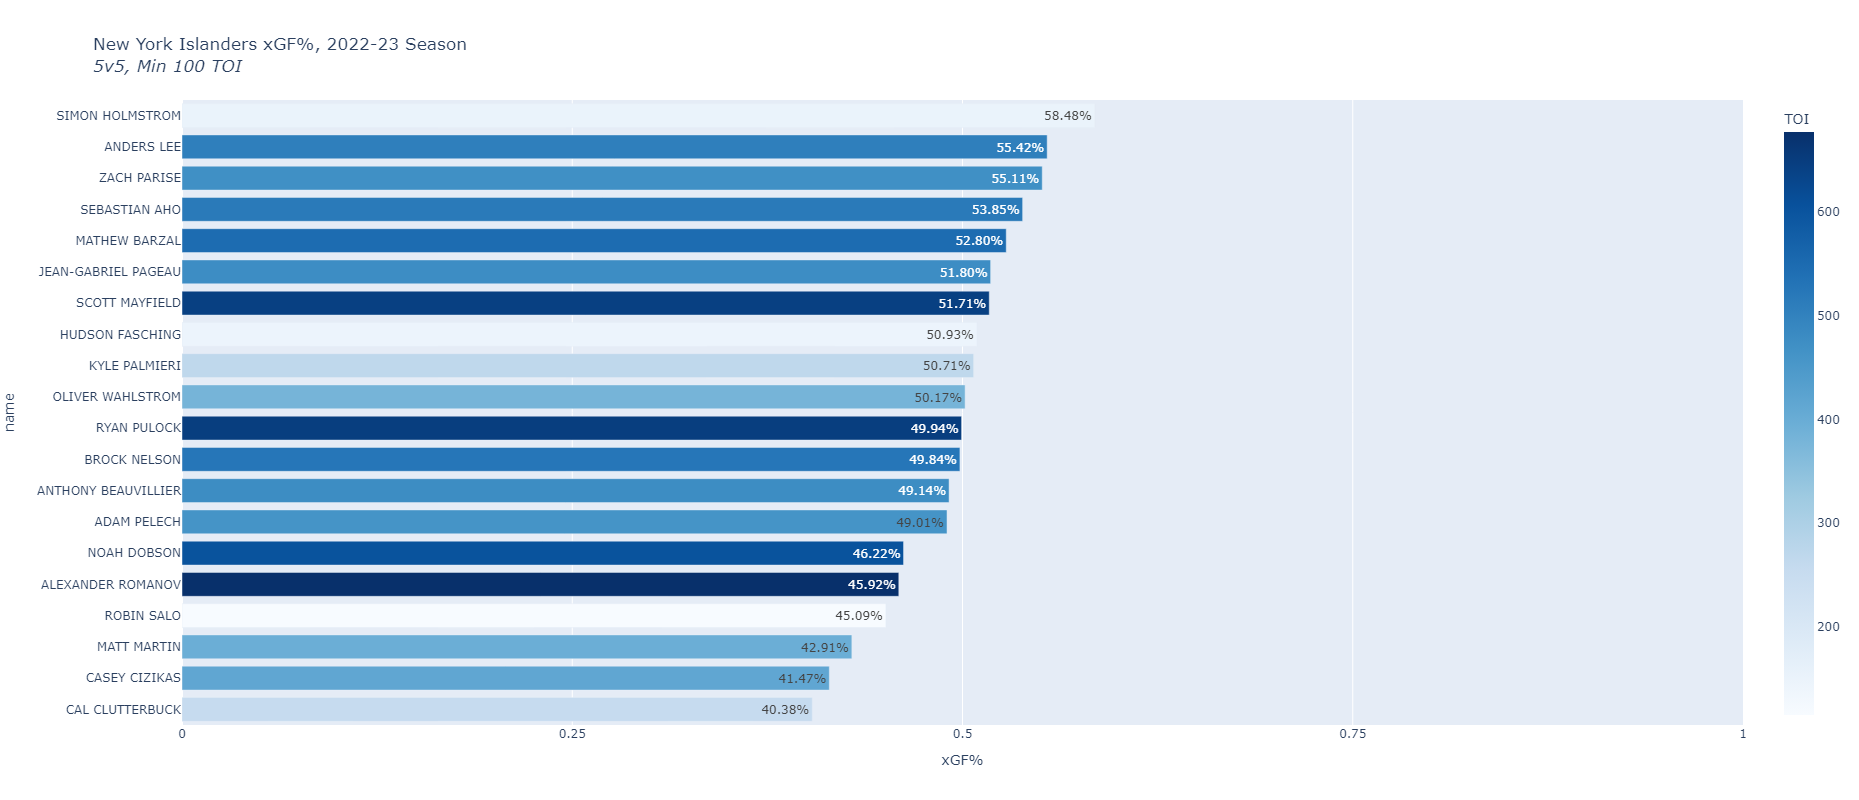

In [38]:
import plotly.express as px
data = islanders_data
data = data.sort_values(by=['xGF%'])
data = data[data['TOI']>100]
data['xGF%_str'] = data['xGF%'].round(4)*100
data['xGF%_str']  = data['xGF%_str'] .map('{:,.2f}%'.format)
fig = px.bar(data, x='xGF%', y='name',text=('xGF%_str'),
             hover_data=['name', 'TOI'], color='TOI',color_continuous_scale=px.colors.sequential.Blues
            )
fig.update_layout(
    autosize=False,
    height=800,
    width=900,
    bargap=0.15,
    bargroupgap=0.1,
    barmode="stack",
    hovermode="x",
    margin=dict(r=20, l=30, b=75, t=100),
    title=("New York Islanders xGF%, 2022-23 Season<br>" +
           "<i>5v5, Min 100 TOI</i>"),
)
fig.update_xaxes(range=[0, 1])
fig.update_xaxes(tickvals=[0,.25,.5,.75,1])
fig.show()

In [19]:
game

,index,Period,distanceFromLast,isHomeTeam,isRebound,isRush,lastEvent_Faceoff,lastEvent_OpponentGive,lastEvent_OpponentHit,lastEvent_OpponentMiss,...,gameSeconds,p1_name,p1_ID,p2_name,p2_ID,p3_name,p3_ID,Type,Description,teamCodeAgainst
1306241,1306241,1,168.077363,1,0,0,0,0,1,0,...,25.0,SHELDON DRIES,8480326.0,NaN,NaN,NaN,NaN,BACKHAND,"VAN ONGOAL - #15 DRIES, Backhand, Off. Zone, 2...",NYI
1306242,1306242,1,19.235384,1,0,0,0,0,1,0,...,50.0,CONOR GARLAND,8478856.0,NaN,NaN,NaN,NaN,WRIST SHOT,"VAN #8 GARLAND, Wrist, Wide of Net, Off. Zone,...",NYI
1306243,1306243,1,49.517674,1,0,0,0,0,0,0,...,60.0,ANDREI KUZMENKO,8483808.0,NaN,NaN,NaN,NaN,WRIST SHOT,"VAN #96 KUZMENKO, Wrist, Over Net, Off. Zone, ...",NYI
1306244,1306244,1,24.596748,1,0,0,1,0,0,0,...,239.0,SHELDON DRIES,8480326.0,NaN,NaN,NaN,NaN,WRAP-AROUND,"VAN ONGOAL - #15 DRIES, Wrap-around, Off. Zone...",NYI
1306245,1306245,1,18.439089,1,0,0,0,0,0,0,...,274.0,LANE PEDERSON,8478967.0,NaN,NaN,NaN,NaN,TIP-IN,"VAN ONGOAL - #29 PEDERSON, Tip-In, Off. Zone, ...",NYI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306316,1306316,3,31.400637,1,0,0,0,0,0,0,...,3419.0,QUINN HUGHES,8480800.0,NaN,NaN,NaN,NaN,SLAP SHOT,"VAN #43 HUGHES, Slap, Over Net, Off. Zone, 53 ft.",NYI
1306317,1306317,3,1.414214,1,0,0,0,0,0,0,...,3462.0,QUINN HUGHES,8480800.0,NaN,NaN,NaN,NaN,SLAP SHOT,"VAN ONGOAL - #43 HUGHES, Slap, Off. Zone, 52 ft.",NYI
1306318,1306318,3,85.287748,1,0,0,1,0,0,0,...,3498.0,DAKOTA JOSHUA,8478057.0,NaN,NaN,NaN,NaN,WRIST SHOT,"VAN ONGOAL - #81 JOSHUA, Wrist, Off. Zone, 8 ft.",NYI
1306319,1306319,3,62.201286,0,0,0,0,1,0,0,...,3517.0,AATU RATY,8482691.0,NaN,NaN,NaN,NaN,WRIST SHOT,"NYI ONGOAL - #16 RATY, Wrist, Off. Zone, 41 ft.",VAN


In [21]:
home_shots = game[game['isHomeTeam']==1]
away_shots = game[game['isHomeTeam']==0]

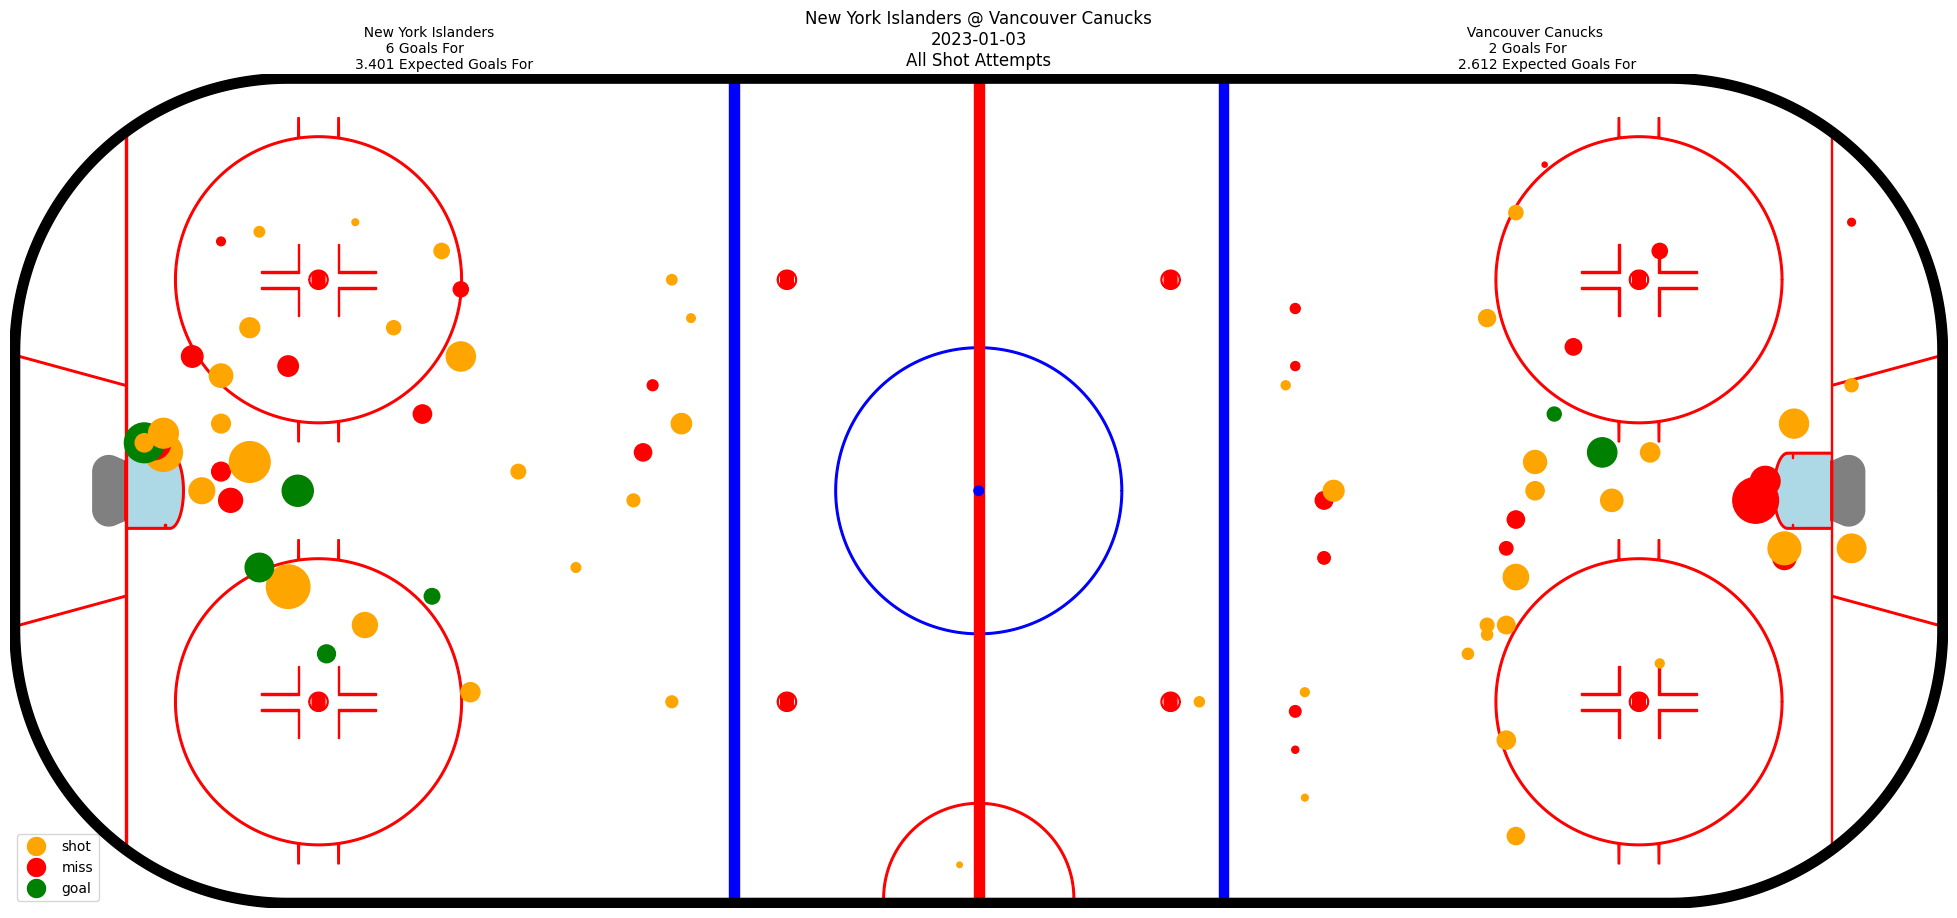

In [29]:
#Plot both teams even stregth shots
from hockey_rink import NHLRink
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
nhl_rink = NHLRink(rotation=90)
fig=plt.figure(figsize=(25,25))
plt.xlim([0,100])
plt.ylim([-42.5, 42.5])
rink = NHLRink()
rink.draw()
plt.scatter((away_shots['xCordAdjusted']*-1),(away_shots['yCordAdjusted']*-1), (away_shots['xG']*3000) ,c= np.where((away_shots['Event']=="GOAL"),'green',np.where((away_shots['Event']=="SHOT"),'orange','red')),zorder=10)
plt.scatter((home_shots['xCordAdjusted']),(home_shots['yCordAdjusted']), (home_shots['xG']*3000) ,c= np.where((home_shots['Event']=="GOAL"),'green',np.where((home_shots['Event']=="SHOT"),'orange','red')),zorder=10)         
'''
plt.scatter(h,hsyc,adj_hsxg,marker='o',color='#fcbd4e')
plt.scatter(hmxc,hmyc,adj_hmxg,marker='o',color='#c42b00')
plt.scatter(hgxc,hgyc,adj_hgxg,marker='o',color='#008f39')
'''
custom_points = [Line2D([0], [0], marker='o', color='w', label='shot', markerfacecolor='orange', markersize=15),
                Line2D([0], [0], marker='o', color='w', label='miss', markerfacecolor='red', markersize=15),
                Line2D([0], [0], marker='o', color='w', label='goal', markerfacecolor='green', markersize=15)]
'''
plt.scatter(adj_asxc,adj_asyc,adj_asxg,marker='o',color='#fcbd4e', label='shot')
plt.scatter(adj_amxc,adj_amyc,adj_amxg,marker='o',color='#c42b00', label='miss')
plt.scatter(adj_agxc,adj_agyc,adj_agxg,marker='o',color='#008f39', label='goal')
'''
#away_team_goals = away_shots['goal'].sum()
away_team_goals = "6"
home_team_goals = home_shots['goal'].sum()
away_team_xg = round(away_shots['xG'].sum(),3)
home_team_xg = round(home_shots['xG'].sum(),3)
plt.title("New York Islanders @ Vancouver Canucks\n2023-01-03\nAll Shot Attempts")
plt.text(-65,44,'  New York Islanders\n       '+str(away_team_goals) + " Goals For\n"+ str(away_team_xg) + " Expected Goals For")
plt.text(50,44,'  Vancouver Canucks\n       '+str(home_team_goals) + " Goals For\n"+ str(home_team_xg) + " Expected Goals For")
plt.legend(handles=custom_points,loc='lower left')

In [220]:
seasons_shots = shots_2022
team_xg = pd.DataFrame(columns=['team','xGF','xGA','xGF%'])
total_xGoalsF = []
total_xGoalsA = []
teams = seasons_shots['Ev_Team'].value_counts()
teams = dict(teams)
teams_list = list(teams.keys())
for team in teams.keys():
    '''
    games_played = seasons_shots[(seasons_shots['Ev_Team']==team)]
    team_games_played=len(games_played['Game_Id'].value_counts())
    print(team,team_games_played)
    shots_for = seasons_shots[(seasons_shots['Ev_Team']==team)]
    shots_against = seasons_shots[(seasons_shots['teamCodeAgainst']==team)]
    team_total_xGF = (shots_for['xG'].sum()/team_games_played)
    team_total_xGA = (shots_against['xG'].sum()/team_games_played)
    total_xGoalsF.append(team_total_xGF)
    total_xGoalsA.append(team_total_xGA)
    '''
    shots_for = seasons_shots[(seasons_shots['Ev_Team']==team) & (seasons_shots['Strength_Mapped']=='even')]
    xg_for = shots_for['xG'].sum()
    shots_against = seasons_shots[(seasons_shots['teamCodeAgainst']==team) & (seasons_shots['Strength_Mapped']=='even')]
    xg_against= shots_against['xG'].sum()
    total_xGoalsF.append(xg_for)
    xg_percent = (xg_for)/(xg_for+xg_against)
    team_xg = team_xg.append({'team':team,'xGF':xg_for,'xGA':xg_against,'xGF%':xg_percent},ignore_index=True)
team_xg = team_xg.sort_values(by=['xGF%'],ascending=True)
team_xg

,team,xGF,xGA,xGF%
23,ANA,75.690993,116.798012,0.393222
31,ARI,62.676028,86.320120,0.420655
30,CHI,67.879796,92.834324,0.422364
28,CBJ,71.953849,91.490758,0.440234
25,VAN,76.472799,94.582737,0.447064
29,MTL,79.800807,98.311562,0.448036
26,PHI,74.054368,89.343664,0.453215
22,STL,83.373754,98.861992,0.457505
27,DET,73.216420,82.664534,0.469694
19,NSH,84.719216,90.417858,0.483731


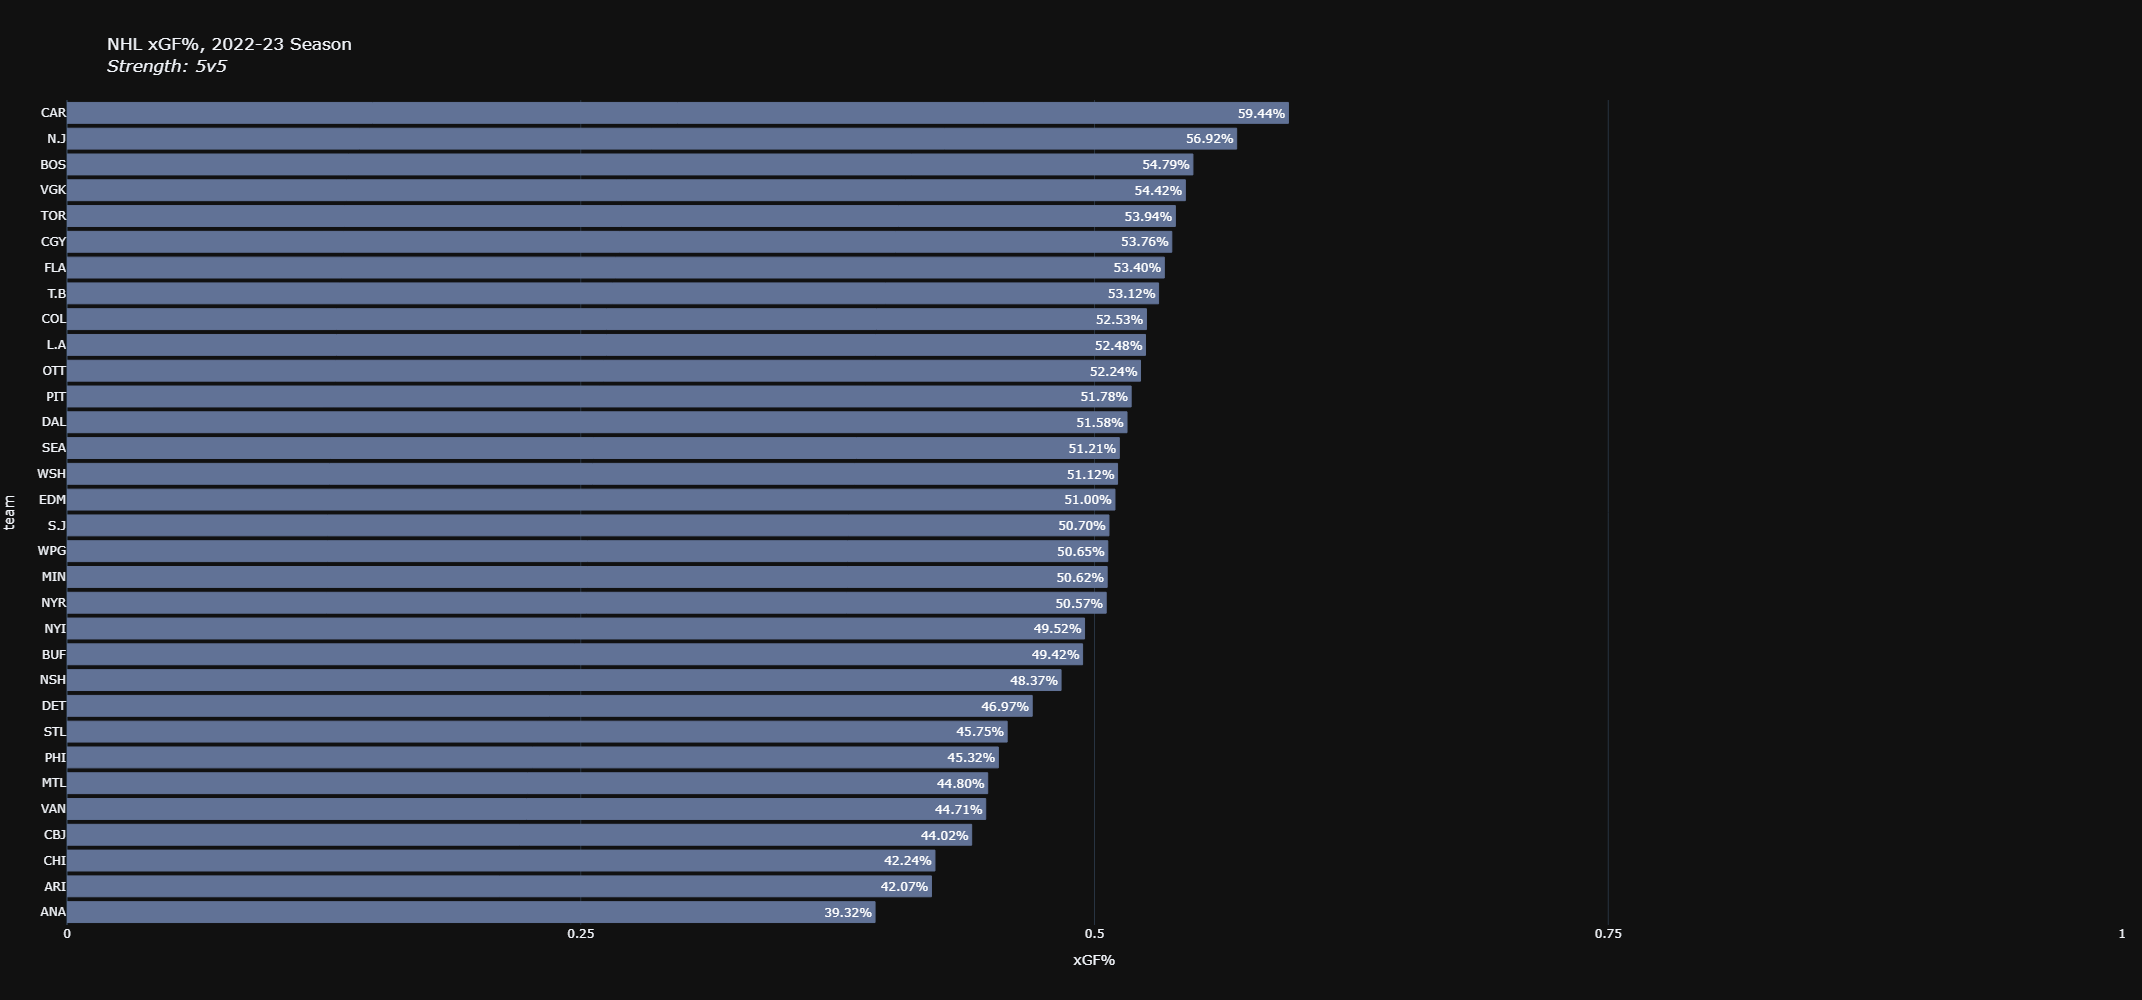

In [221]:
import plotly.express as px
data2 = team_xg
data2 = data2.sort_values(by=['xGF%'])
data2['xGF%_str'] = data2['xGF%'].round(4)*100
data2['xGF%_str']  = data2['xGF%_str'] .map('{:,.2f}%'.format)
fig = px.bar(data2, x='xGF%', y='team',text=('xGF%_str'),
             hover_data=['team', 'xGF','xGA'],template="plotly_dark",
            )
fig.update_layout(
    autosize=False,
    height=1000,
    width=1300,
    bargap=0.10,
    bargroupgap=0.1,
    barmode="stack",
    hovermode="x",
    margin=dict(r=20, l=30, b=75, t=100),
    title=("NHL xGF%, 2022-23 Season<br>" +
           "<i>Strength: 5v5</i>"),
)
fig.update_xaxes(range=[0, 1])
fig.update_xaxes(tickvals=[0,.25,.5,.75,1])
fig.update_traces(marker_color='#617296', marker_line_color='#617296',
                  marker_line_width=1)
fig.show()

In [359]:
#First period stats
seasons_shots = shots_2022
first_period_team_xg = pd.DataFrame(columns=['team','xGF','xGA','xGF%'])
total_xGoalsF = []
total_xGoalsA = []
teams = seasons_shots['Ev_Team'].value_counts()
teams = dict(teams)
teams_list = list(teams.keys())
for team in teams.keys():
    '''
    games_played = seasons_shots[(seasons_shots['Ev_Team']==team)]
    team_games_played=len(games_played['Game_Id'].value_counts())
    print(team,team_games_played)
    shots_for = seasons_shots[(seasons_shots['Ev_Team']==team)]
    shots_against = seasons_shots[(seasons_shots['teamCodeAgainst']==team)]
    team_total_xGF = (shots_for['xG'].sum()/team_games_played)
    team_total_xGA = (shots_against['xG'].sum()/team_games_played)
    total_xGoalsF.append(team_total_xGF)
    total_xGoalsA.append(team_total_xGA)
    '''
    #shots_for = seasons_shots[(seasons_shots['Ev_Team']==team) & (seasons_shots['homeSkatersOnIce']==5)& (seasons_shots['awaySkatersOnIce']==5) & (seasons_shots['Period']==1)]
    shots_for = seasons_shots[(seasons_shots['Ev_Team']==team) & (seasons_shots['Strength_Mapped']=='even') & (seasons_shots['Period']==1)]
    xg_for = shots_for['xG'].sum()
    shots_against = seasons_shots[(seasons_shots['teamCodeAgainst']==team) & (seasons_shots['Strength_Mapped']=='even')& (seasons_shots['Period']==1)]
    xg_against= shots_against['xG'].sum()
    total_xGoalsF.append(xg_for)
    xg_percent = (xg_for)/(xg_for+xg_against)
    first_period_team_xg = first_period_team_xg.append({'team':team,'xGF':xg_for,'xGA':xg_against,'xGF%':xg_percent},ignore_index=True)
first_period_team_xg = first_period_team_xg.sort_values(by=['xGF%'],ascending=True)
first_period_team_xg

,team,xGF,xGA,xGF%
31,ARI,17.127175,25.953961,0.397556
30,CHI,20.938074,30.651335,0.405860
23,ANA,26.438977,34.753875,0.432060
25,VAN,23.000048,29.823372,0.435414
28,CBJ,22.214597,26.899100,0.452310
29,MTL,26.564505,32.021769,0.453425
22,STL,24.131413,29.032938,0.453902
26,PHI,23.358869,27.821538,0.456403
12,NYI,26.703271,30.816144,0.464248
19,NSH,26.557988,30.458490,0.465795


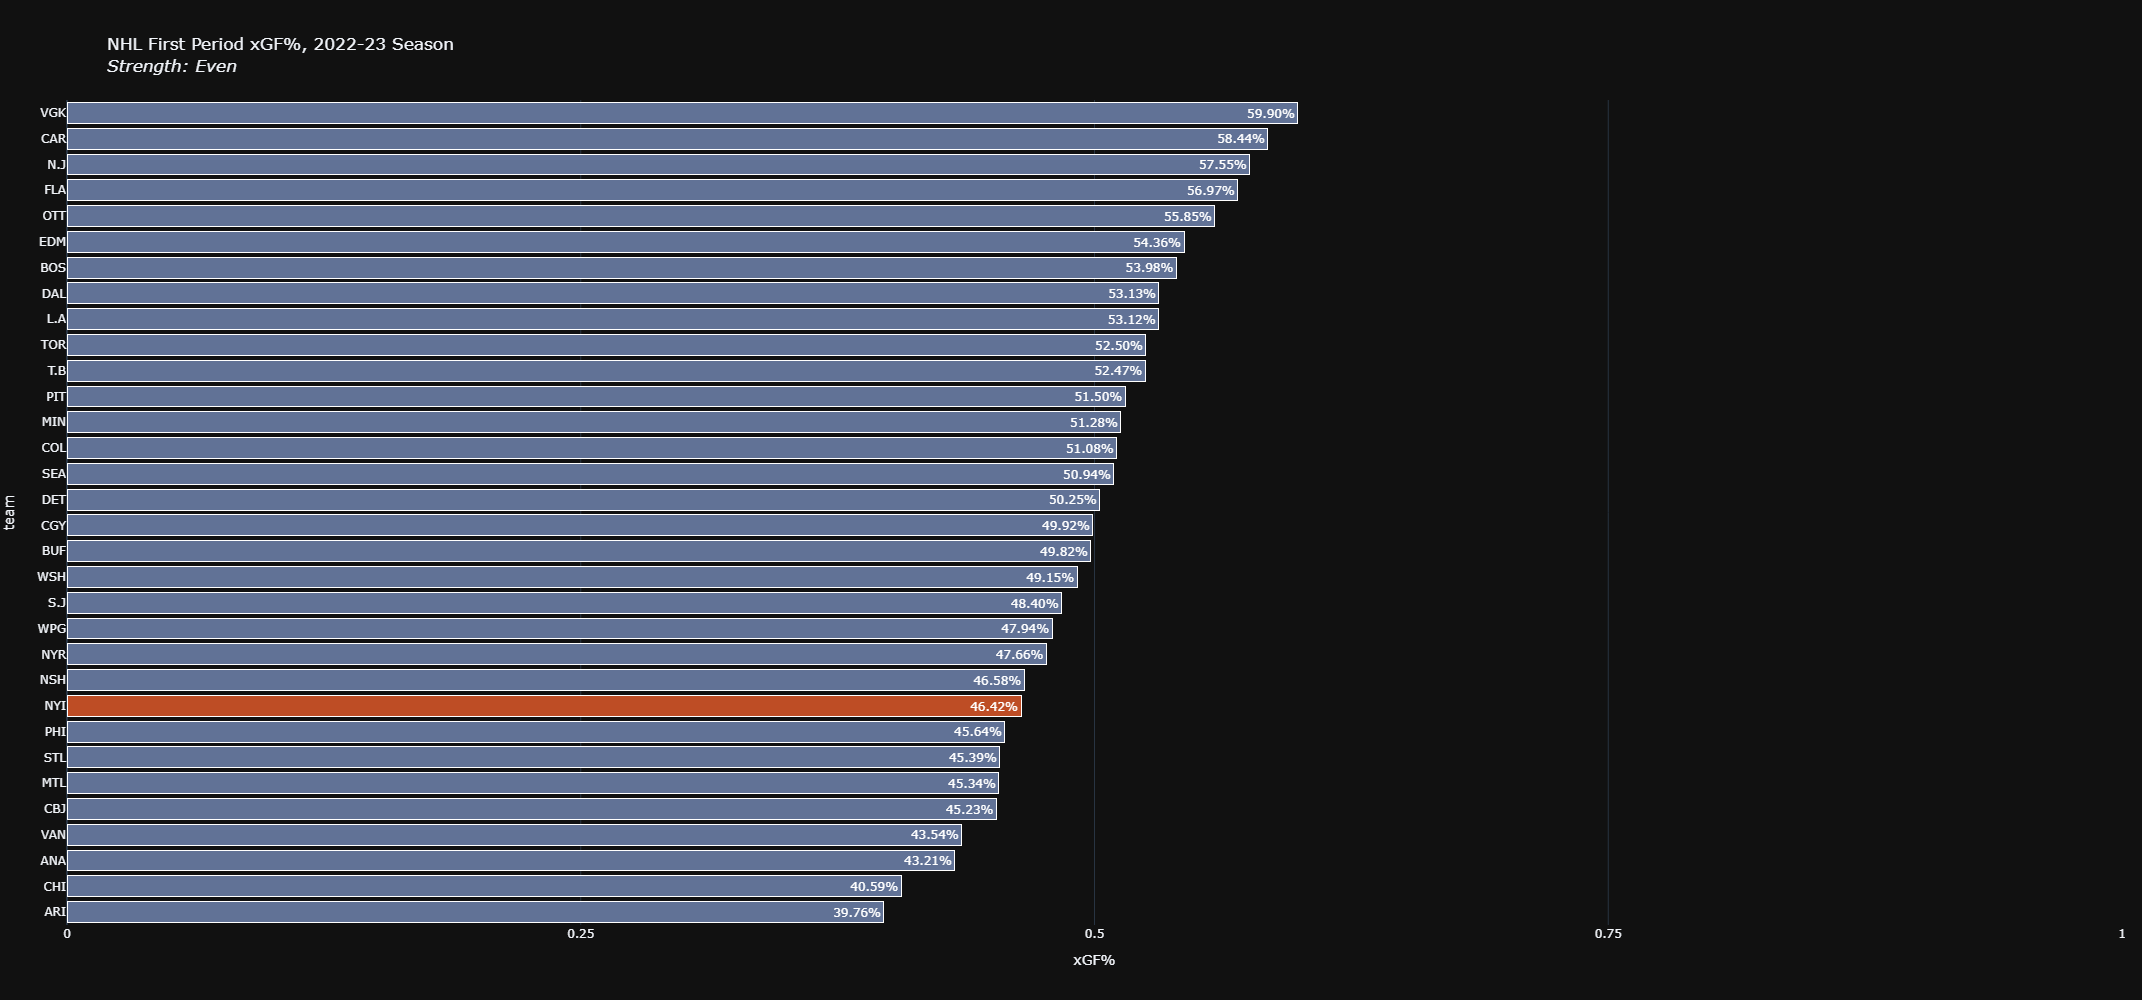

In [360]:
import plotly.express as px
data3 = first_period_team_xg
data3 = data3.sort_values(by=['xGF%'],ascending=False)
data3['xGF%_str'] = data3['xGF%'].round(4)*100
data3['xGF%_str']  = data3['xGF%_str'] .map('{:,.2f}%'.format)
color_discrete_sequence = ['#617296']*len(data3)
color_discrete_sequence[23] = '#be4d25'
fig = px.bar(data3, x='xGF%', y='team',text=('xGF%_str'),
             hover_data=['team', 'xGF','xGA'],template="plotly_dark",
             color='team',
             color_discrete_sequence=color_discrete_sequence
            )
fig.update_layout(
    autosize=False,
    height=1000,
    width=1300,
    bargap=0.10,
    bargroupgap=0.1,
    barmode="stack",
    hovermode="x",
    margin=dict(r=20, l=30, b=75, t=100),
    title=("NHL First Period xGF%, 2022-23 Season<br>" +
           "<i>Strength: Even</i>"),
)
fig.update_xaxes(range=[0, 1])
fig.update_xaxes(tickvals=[0,.25,.5,.75,1])
fig.update_traces(marker_line_color='#FFFFFF',
                  marker_line_width=1)
fig.update_layout(showlegend=False)
fig.show()

In [362]:
#First period stats
seasons_shots = shots_2022
first_period_team_xg = pd.DataFrame(columns=['team','xGF','xGA','xGF%','GF','GA','GF%','period'])
total_xGoalsF = []
total_xGoalsA = []
teams = seasons_shots['Ev_Team'].value_counts()
teams = dict(teams)
teams_list = list(teams.keys())
for team in teams.keys():
    shots_for = seasons_shots[(seasons_shots['Ev_Team']==team) & (seasons_shots['Strength_Mapped']=='even') & (seasons_shots['Period']==1)]
    xg_for = shots_for['xG'].sum()
    g_for=shots_for['goal'].sum()
    shots_against = seasons_shots[(seasons_shots['teamCodeAgainst']==team) & (seasons_shots['Strength_Mapped']=='even')& (seasons_shots['Period']==1)]
    xg_against= shots_against['xG'].sum()
    g_against = shots_against['goal'].sum()
    total_xGoalsF.append(xg_for)
    xg_percent = (xg_for)/(xg_for+xg_against)
    gf_percent = (g_for)/(g_for+g_against)
    first_period_team_xg = first_period_team_xg.append({'team':team,'xGF':xg_for,'xGA':xg_against,'xGF%':xg_percent,'GF':g_for,'GA':g_against,'GF%':gf_percent,'period':1},ignore_index=True)
first_period_team_xg = first_period_team_xg.sort_values(by=['xGF%'],ascending=True)
first_period_team_xg

,team,xGF,xGA,xGF%,GF,GA,GF%,period
31,ARI,17.127175,25.953961,0.397556,14,25,0.358974,1
30,CHI,20.938074,30.651335,0.405860,10,30,0.250000,1
23,ANA,26.438977,34.753875,0.432060,27,32,0.457627,1
25,VAN,23.000048,29.823372,0.435414,27,29,0.482143,1
28,CBJ,22.214597,26.899100,0.452310,16,23,0.410256,1
29,MTL,26.564505,32.021769,0.453425,24,26,0.480000,1
22,STL,24.131413,29.032938,0.453902,25,24,0.510204,1
26,PHI,23.358869,27.821538,0.456403,21,29,0.420000,1
12,NYI,26.703271,30.816144,0.464248,20,24,0.454545,1
19,NSH,26.557988,30.458490,0.465795,25,25,0.500000,1


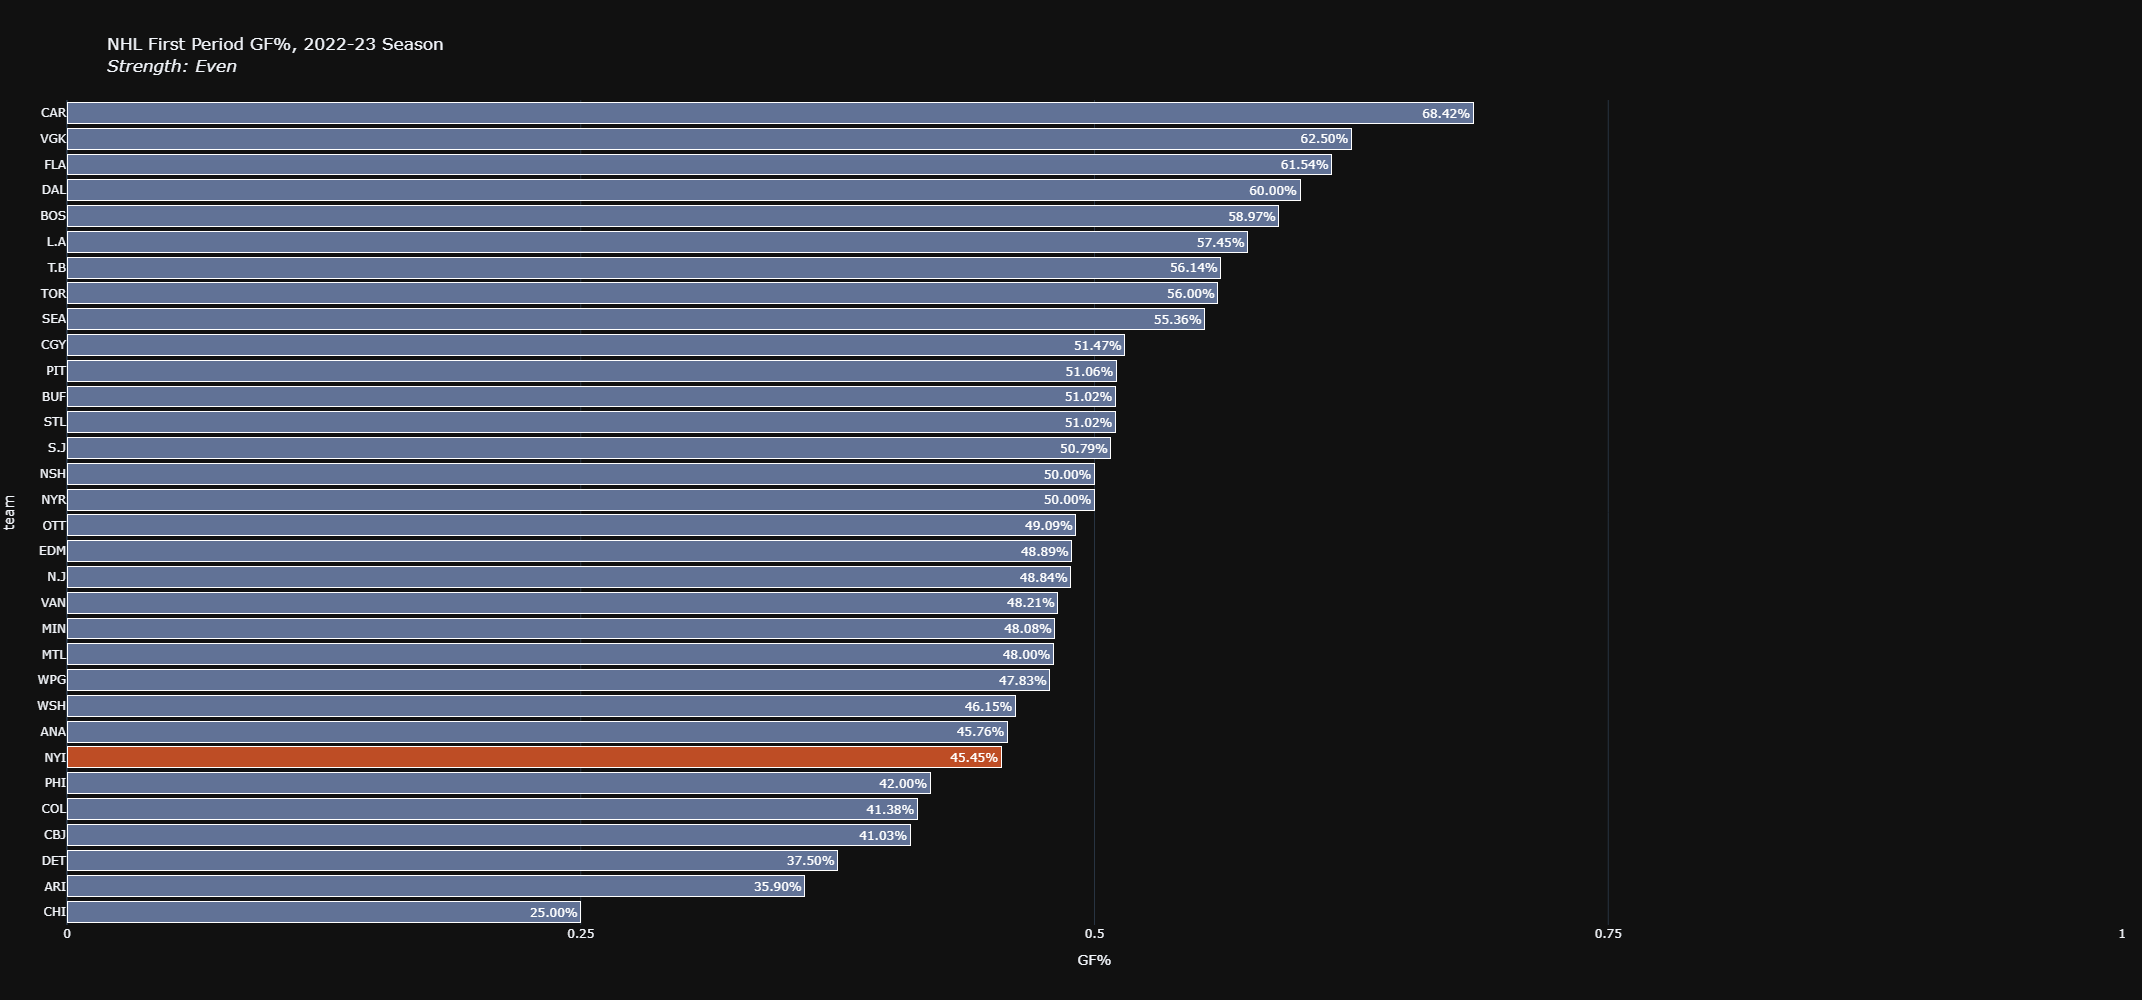

In [363]:
import plotly.express as px
data3 = first_period_team_xg
data3 = data3.sort_values(by=['GF%'],ascending=False)
data3['GF%_str'] = data3['GF%'].round(4)*100
data3['GF%_str']  = data3['GF%_str'] .map('{:,.2f}%'.format)
color_discrete_sequence = ['#617296']*len(data3)
color_discrete_sequence[25] = '#be4d25'
fig = px.bar(data3, x='GF%', y='team',text=('GF%_str'),
             hover_data=['team', 'GF','GA'],template="plotly_dark",
             color='team',
             color_discrete_sequence=color_discrete_sequence
            )
fig.update_layout(
    autosize=False,
    height=1000,
    width=1300,
    bargap=0.10,
    bargroupgap=0.1,
    barmode="stack",
    hovermode="x",
    margin=dict(r=20, l=30, b=75, t=100),
    title=("NHL First Period GF%, 2022-23 Season<br>" +
           "<i>Strength: Even</i>"),
)
fig.update_xaxes(range=[0, 1])
fig.update_xaxes(tickvals=[0,.25,.5,.75,1])
fig.update_traces(marker_line_color='#FFFFFF',
                  marker_line_width=1)
fig.update_layout(showlegend=False)
fig.show()

In [364]:
#Second period
seasons_shots = shots_2022
second_period_team_xg = pd.DataFrame(columns=['team','xGF','xGA','xGF%','GF','GA','GF%','period'])
total_xGoalsF = []
total_xGoalsA = []
teams = seasons_shots['Ev_Team'].value_counts()
teams = dict(teams)
teams_list = list(teams.keys())
for team in teams.keys():
    shots_for = seasons_shots[(seasons_shots['Ev_Team']==team) & (seasons_shots['Strength_Mapped']=='even') & (seasons_shots['Period']==2)]
    xg_for = shots_for['xG'].sum()
    g_for=shots_for['goal'].sum()
    shots_against = seasons_shots[(seasons_shots['teamCodeAgainst']==team) & (seasons_shots['Strength_Mapped']=='even')& (seasons_shots['Period']==2)]
    xg_against= shots_against['xG'].sum()
    g_against = shots_against['goal'].sum()
    total_xGoalsF.append(xg_for)
    xg_percent = (xg_for)/(xg_for+xg_against)
    gf_percent = (g_for)/(g_for+g_against)
    second_period_team_xg = second_period_team_xg.append({'team':team,'xGF':xg_for,'xGA':xg_against,'xGF%':xg_percent,'GF':g_for,'GA':g_against,'GF%':gf_percent,'period':2},ignore_index=True)
second_period_team_xg = second_period_team_xg.sort_values(by=['GF%'],ascending=True)
second_period_team_xg

,team,xGF,xGA,xGF%,GF,GA,GF%,period
23,ANA,24.177684,42.022785,0.365219,18,41,0.305085,2
28,CBJ,25.222710,35.469068,0.415587,24,50,0.324324,2
8,OTT,29.345800,29.601109,0.497834,16,33,0.326531,2
29,MTL,26.150692,34.452481,0.431507,23,35,0.396552,2
22,STL,34.007276,35.788195,0.487242,33,46,0.417722,2
7,VGK,34.799336,34.285099,0.503722,27,37,0.421875,2
16,T.B,26.622052,27.863290,0.488609,17,23,0.425000,2
30,CHI,24.850374,29.567682,0.456657,25,33,0.431034,2
10,EDM,29.079974,33.187072,0.467020,26,34,0.433333,2
15,S.J,34.546028,31.437042,0.523559,33,41,0.445946,2


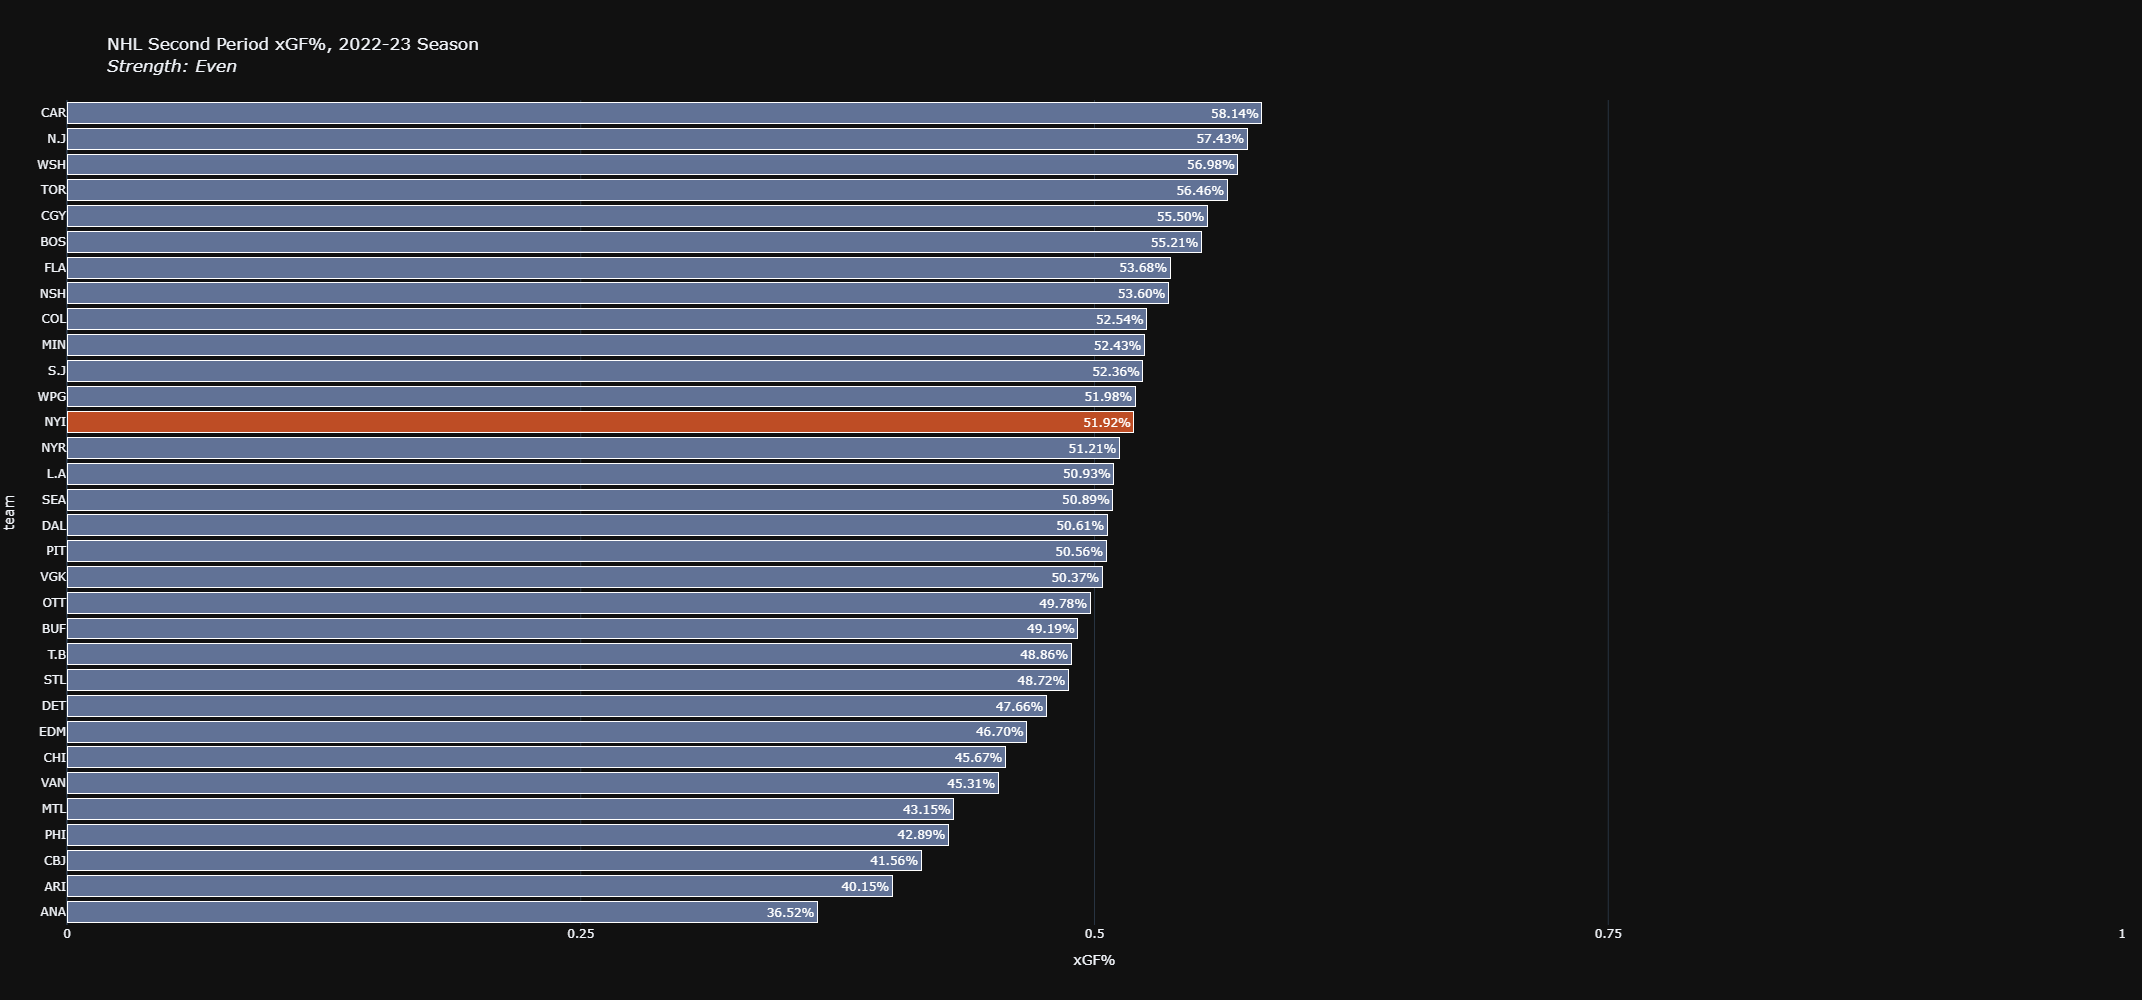

In [365]:
import plotly.express as px
data3 = second_period_team_xg
data3 = data3.sort_values(by=['xGF%'],ascending=False)
data3['xGF%_str'] = data3['xGF%'].round(4)*100
data3['xGF%_str']  = data3['xGF%_str'] .map('{:,.2f}%'.format)
color_discrete_sequence = ['#617296']*len(data3)
color_discrete_sequence[12] = '#be4d25'
fig = px.bar(data3, x='xGF%', y='team',text=('xGF%_str'),
             hover_data=['team', 'xGF','xGA'],template="plotly_dark",
             color='team',
             color_discrete_sequence=color_discrete_sequence
            )
fig.update_layout(
    autosize=False,
    height=1000,
    width=1300,
    bargap=0.10,
    bargroupgap=0.1,
    barmode="stack",
    hovermode="x",
    margin=dict(r=20, l=30, b=75, t=100),
    title=("NHL Second Period xGF%, 2022-23 Season<br>" +
           "<i>Strength: Even</i>"),
)
fig.update_xaxes(range=[0, 1])
fig.update_xaxes(tickvals=[0,.25,.5,.75,1])
fig.update_traces(marker_line_color='#FFFFFF',
                  marker_line_width=1)
fig.update_layout(showlegend=False)
fig.show()

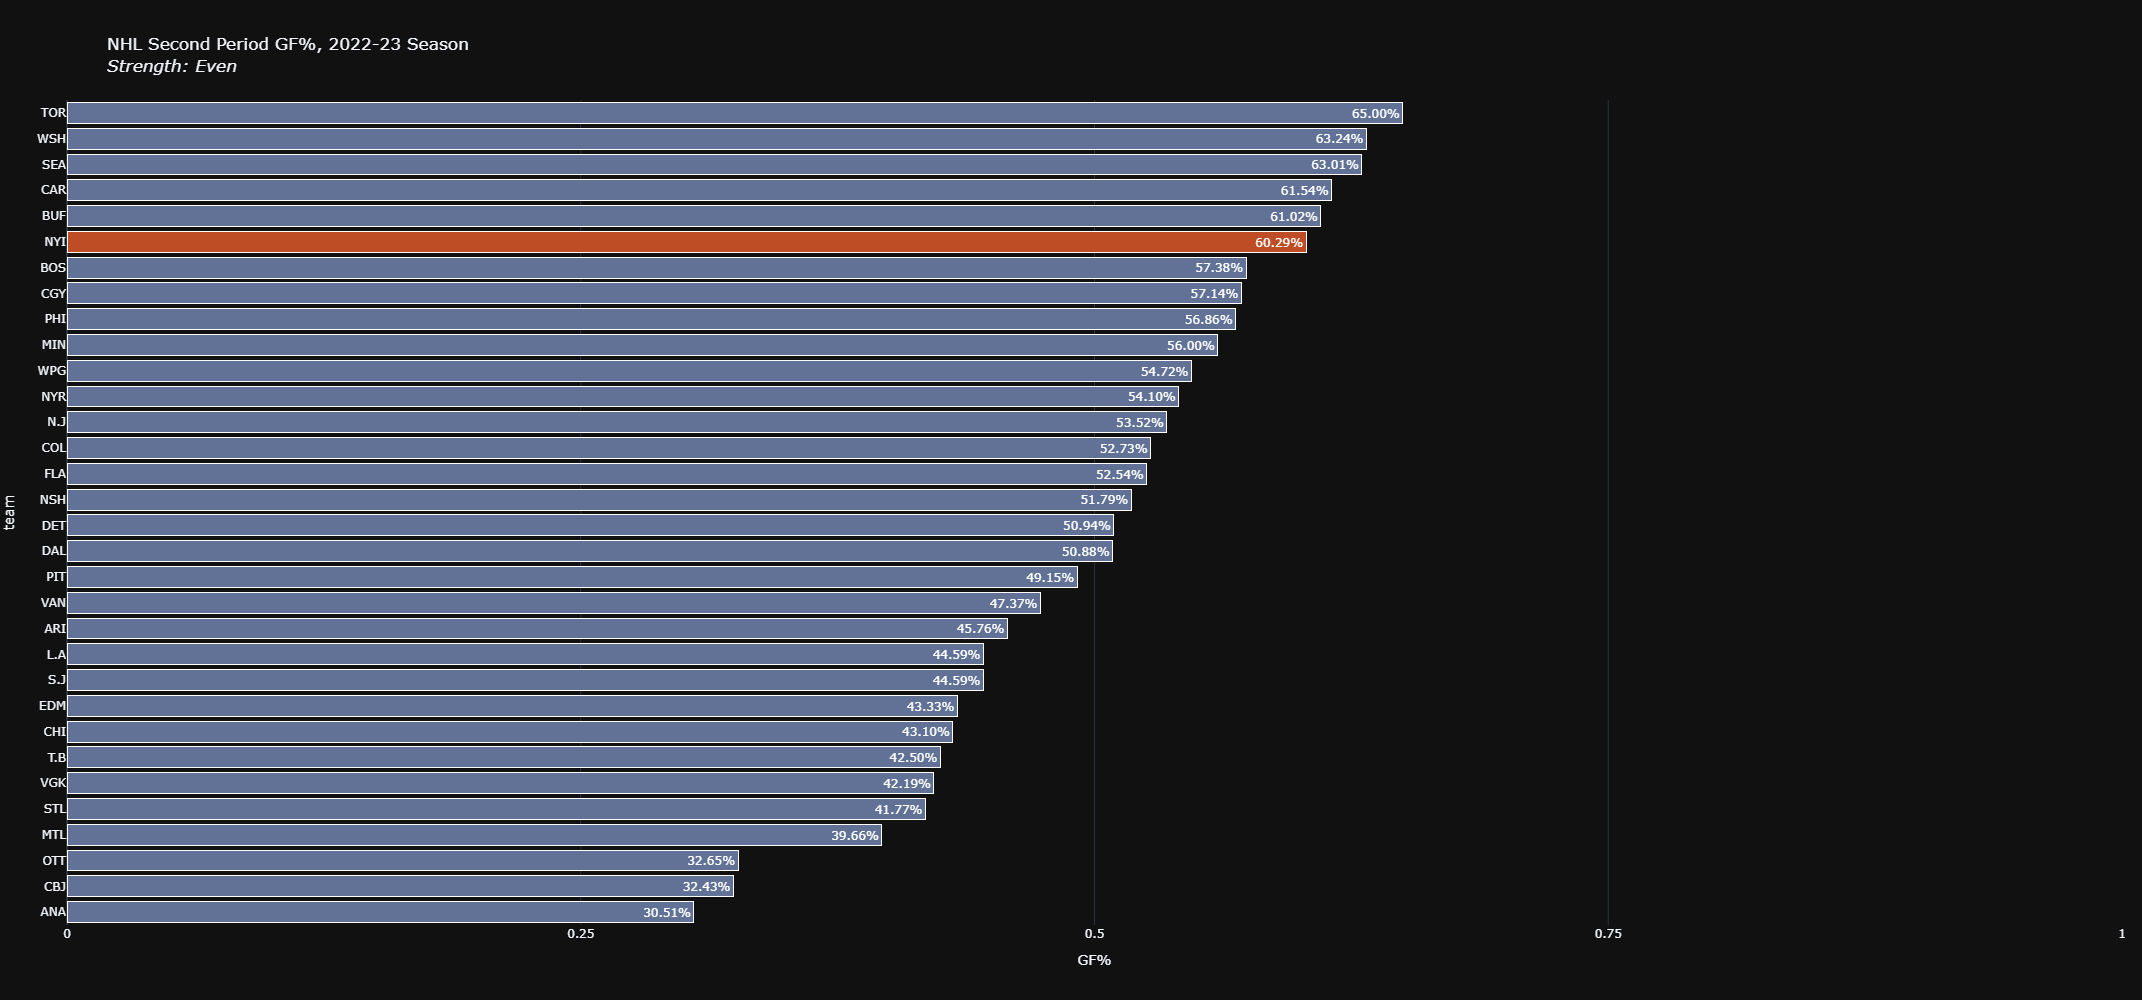

In [366]:
import plotly.express as px
data3 = second_period_team_xg
data3 = data3.sort_values(by=['GF%'],ascending=False)
data3['GF%_str'] = data3['GF%'].round(4)*100
data3['GF%_str']  = data3['GF%_str'] .map('{:,.2f}%'.format)
color_discrete_sequence = ['#617296']*len(data3)
color_discrete_sequence[5] = '#be4d25'
fig = px.bar(data3, x='GF%', y='team',text=('GF%_str'),
             hover_data=['team', 'GF','GA'],template="plotly_dark",
             color='team',
             color_discrete_sequence=color_discrete_sequence
            )
fig.update_layout(
    autosize=False,
    height=1000,
    width=1300,
    bargap=0.10,
    bargroupgap=0.1,
    barmode="stack",
    hovermode="x",
    margin=dict(r=20, l=30, b=75, t=100),
    title=("NHL Second Period GF%, 2022-23 Season<br>" +
           "<i>Strength: Even</i>"),
)
fig.update_xaxes(range=[0, 1])
fig.update_xaxes(tickvals=[0,.25,.5,.75,1])
fig.update_traces(marker_line_color='#FFFFFF',
                  marker_line_width=1)
fig.update_layout(showlegend=False)
fig.show()

In [349]:
#Third period
seasons_shots = shots_2022
third_period_team_xg = pd.DataFrame(columns=['team','xGF','xGA','xGF%','GF','GA','GF%','period'])
total_xGoalsF = []
total_xGoalsA = []
teams = seasons_shots['Ev_Team'].value_counts()
teams = dict(teams)
teams_list = list(teams.keys())
for team in teams.keys():
    shots_for = seasons_shots[(seasons_shots['Ev_Team']==team) & (seasons_shots['Strength_Mapped']=='even') & (seasons_shots['Period']==3)]
    xg_for = shots_for['xG'].sum()
    g_for=shots_for['goal'].sum()
    shots_against = seasons_shots[(seasons_shots['teamCodeAgainst']==team) & (seasons_shots['Strength_Mapped']=='even')& (seasons_shots['Period']==3)]
    xg_against= shots_against['xG'].sum()
    g_against = shots_against['goal'].sum()
    total_xGoalsF.append(xg_for)
    xg_percent = (xg_for)/(xg_for+xg_against)
    gf_percent = (g_for)/(g_for+g_against)
    third_period_team_xg = third_period_team_xg.append({'team':team,'xGF':xg_for,'xGA':xg_against,'xGF%':xg_percent,'GF':g_for,'GA':g_against,'GF%':gf_percent,'period':3},ignore_index=True)
third_period_team_xg = third_period_team_xg.sort_values(by=['GF%'],ascending=True)
third_period_team_xg

,team,xGF,xGA,xGF%,GF,GA,GF%,period
30,CHI,20.030681,31.576043,0.388141,13,31,0.295455,3
23,ANA,22.431704,37.121258,0.376668,17,34,0.333333,3
15,S.J,28.238304,26.563533,0.515280,24,37,0.393443,3
28,CBJ,23.123198,28.635580,0.446749,26,33,0.440678,3
19,NSH,23.916237,30.239630,0.441619,16,20,0.444444,3
29,MTL,25.490773,30.490162,0.455347,30,37,0.447761,3
21,BUF,25.439614,28.452976,0.472043,27,33,0.450000,3
0,CAR,38.939889,23.446875,0.624169,23,28,0.450980,3
31,ARI,20.546477,22.620738,0.475974,25,30,0.454545,3
26,PHI,24.600483,26.612646,0.480355,22,26,0.458333,3


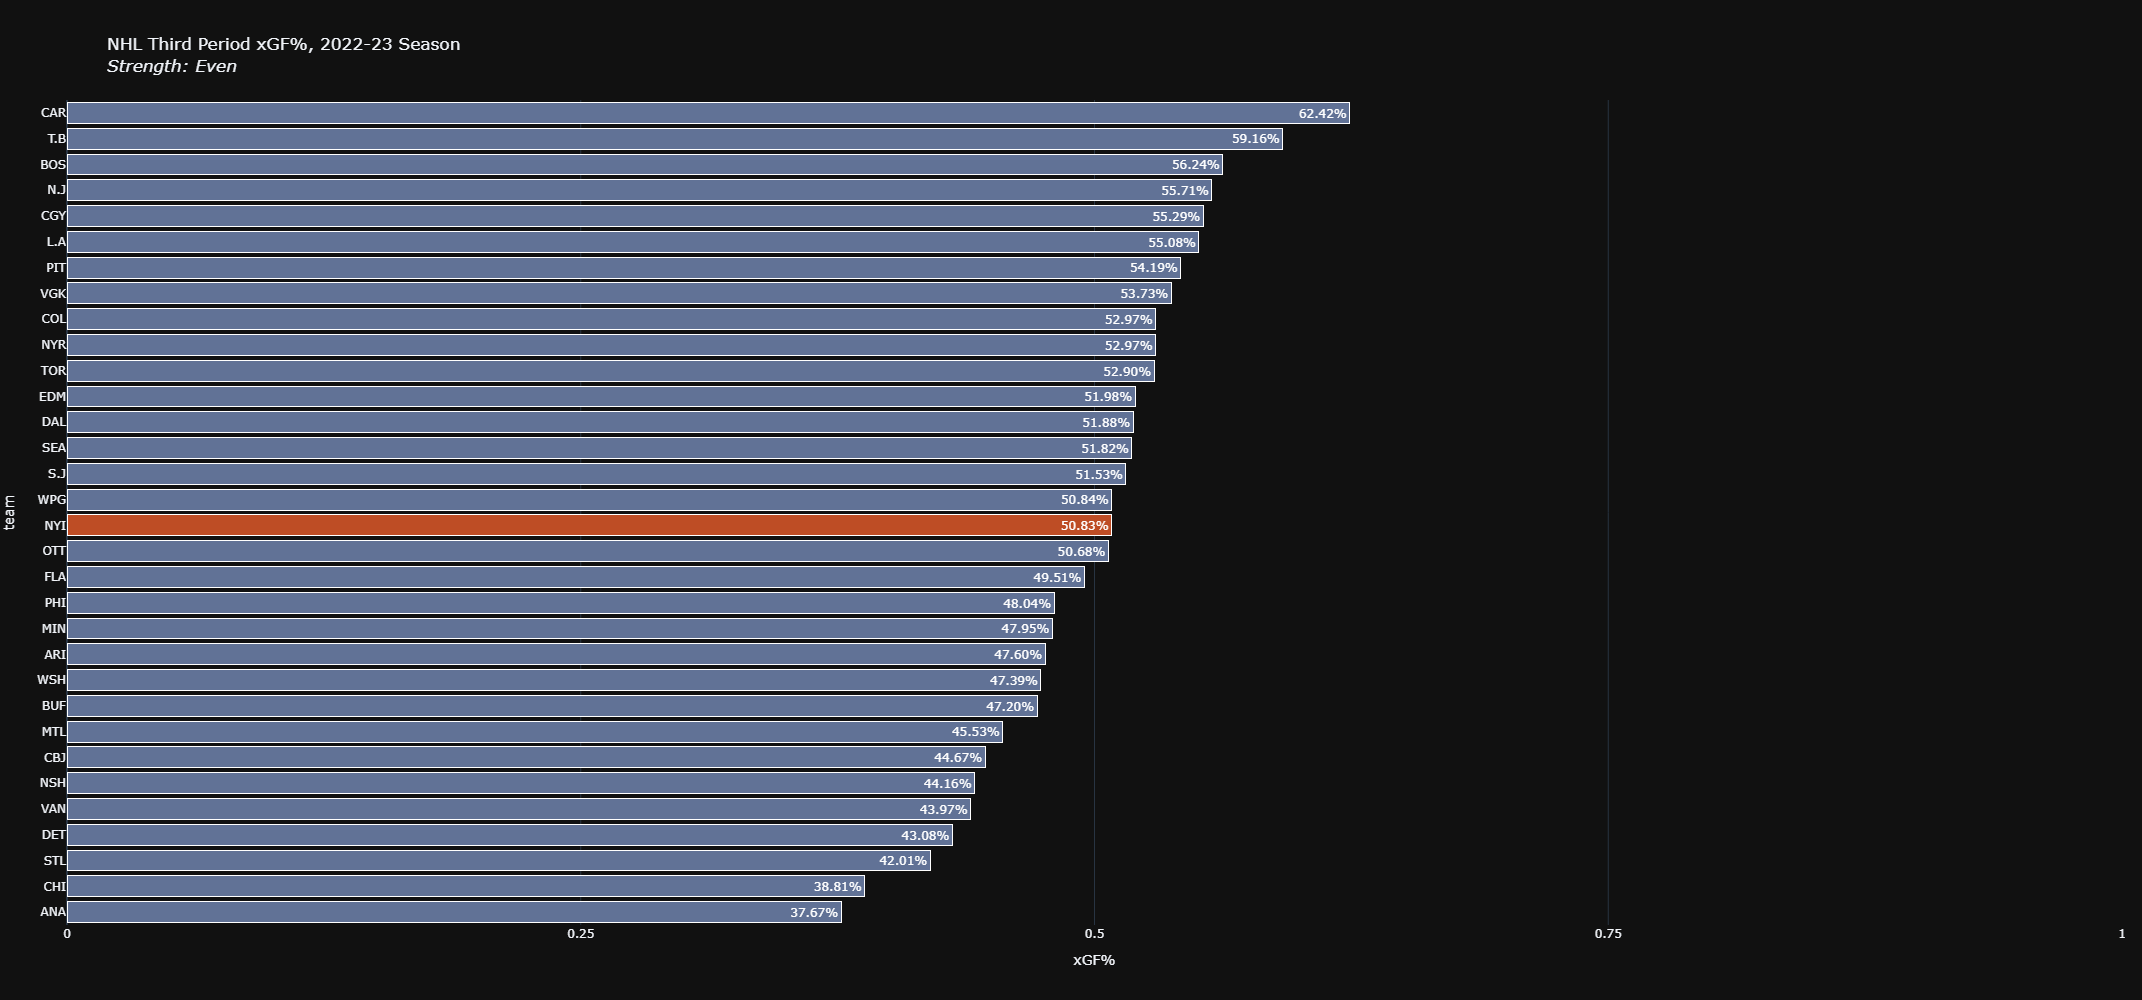

In [350]:
import plotly.express as px
data3 = third_period_team_xg
data3 = data3.sort_values(by=['xGF%'], ascending=False)
data3['xGF%_str'] = data3['xGF%'].round(4)*100
data3['xGF%_str']  = data3['xGF%_str'] .map('{:,.2f}%'.format)
color_discrete_sequence = ['#617296']*len(data3)
color_discrete_sequence[16] = '#be4d25'
fig = px.bar(data3, x='xGF%', y='team',text=('xGF%_str'),
             hover_data=['team', 'xGF','xGA'],template="plotly_dark",
             color='team',
             color_discrete_sequence=color_discrete_sequence
            )
fig.update_layout(
    autosize=False,
    height=1000,
    width=1300,
    bargap=0.10,
    bargroupgap=0.1,
    barmode="stack",
    hovermode="x",
    margin=dict(r=20, l=30, b=75, t=100),
    title=("NHL Third Period xGF%, 2022-23 Season<br>" +
           "<i>Strength: Even</i>"),
)
fig.update_xaxes(range=[0, 1])
fig.update_xaxes(tickvals=[0,.25,.5,.75,1])
fig.update_traces(marker_line_color='#FFFFFF',
                  marker_line_width=1)
fig.update_layout(showlegend=False)
fig.show()

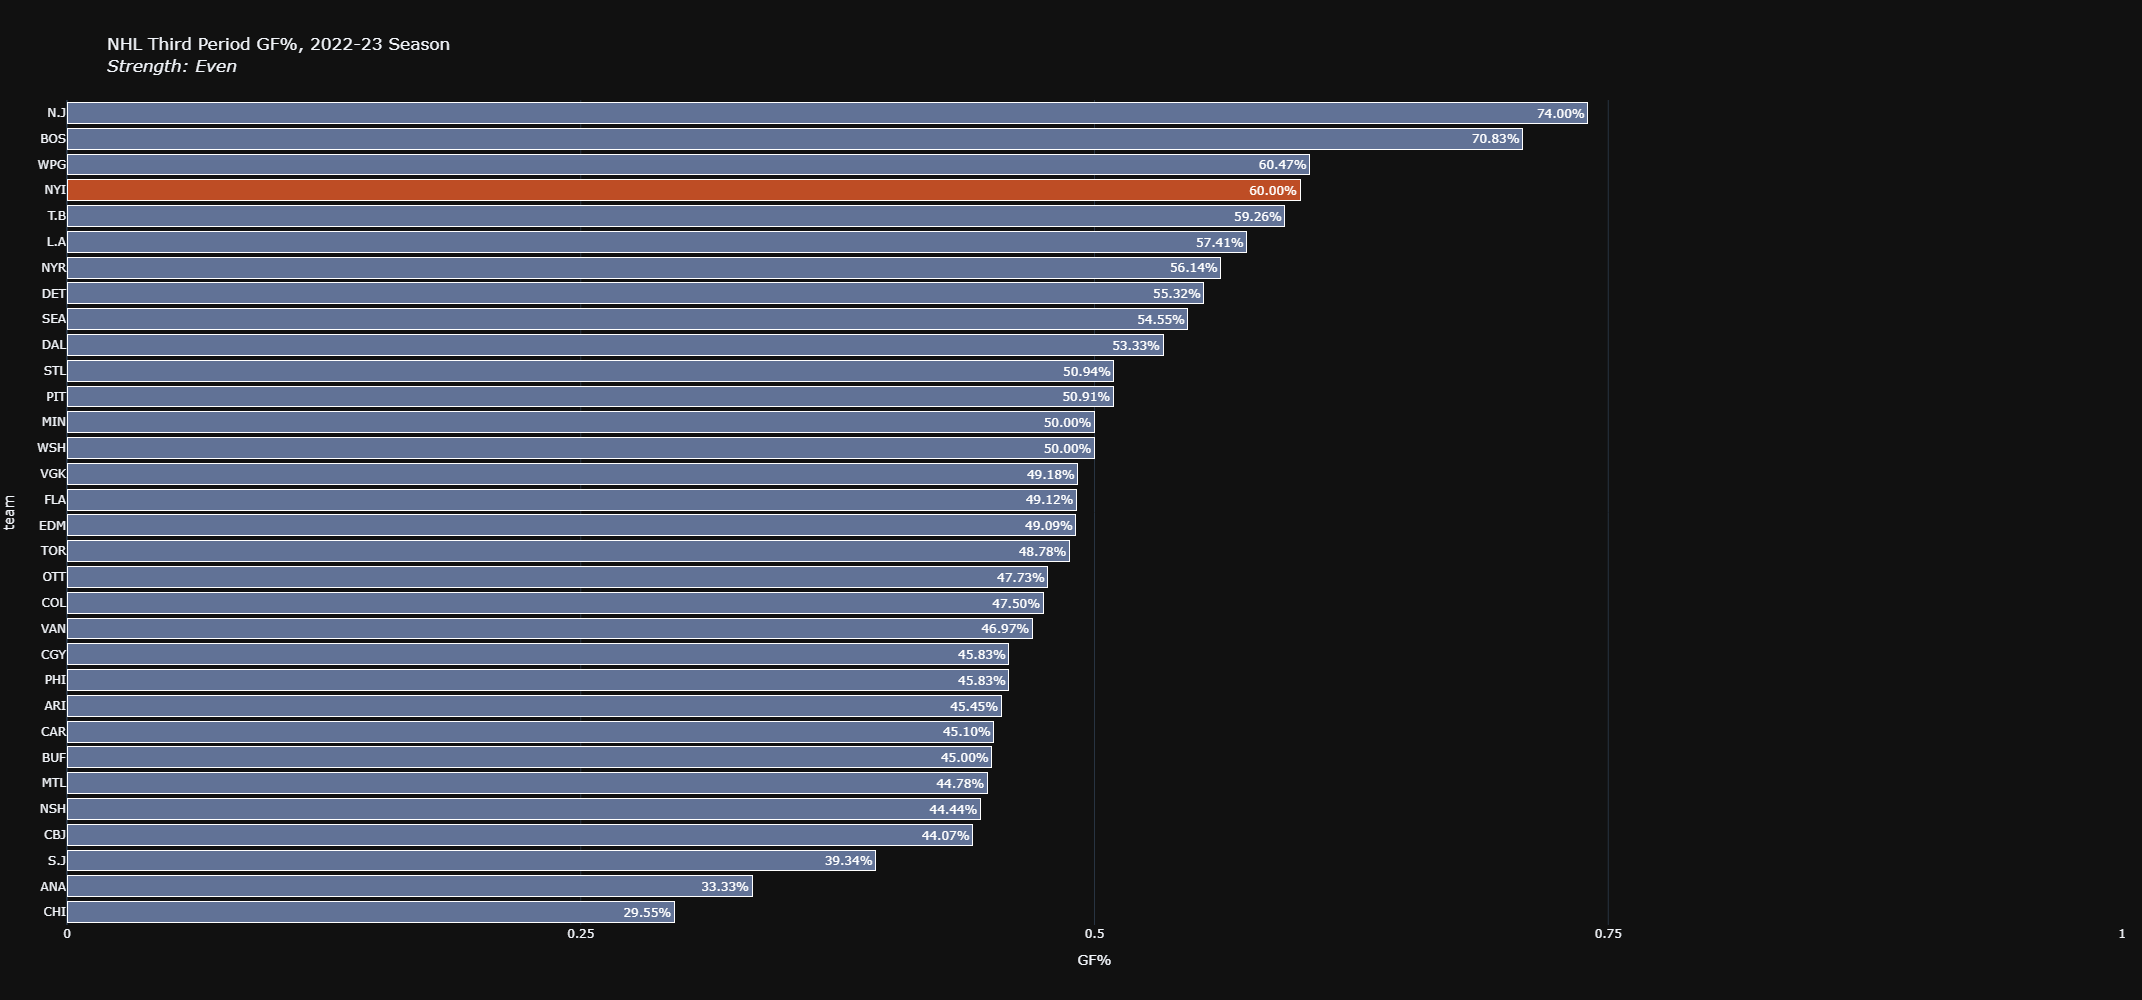

In [351]:
import plotly.express as px
data3 = third_period_team_xg
data3 = data3.sort_values(by=['GF%'],ascending=False)
data3['GF%_str'] = data3['GF%'].round(4)*100
data3['GF%_str']  = data3['GF%_str'] .map('{:,.2f}%'.format)
color_discrete_sequence = ['#617296']*len(data3)
color_discrete_sequence[3] = '#be4d25'
fig = px.bar(data3, x='GF%', y='team',text=('GF%_str'),
             hover_data=['team', 'GF','GA'],template="plotly_dark",
             color='team',
             color_discrete_sequence=color_discrete_sequence,
            )
fig.update_layout(
    autosize=False,
    height=1000,
    width=1300,
    bargap=0.10,
    bargroupgap=0.1,
    barmode="stack",
    hovermode="x",
    margin=dict(r=20, l=30, b=75, t=100),
    title=("NHL Third Period GF%, 2022-23 Season<br>" +
           "<i>Strength: Even</i>"),
)
fig.update_xaxes(range=[0, 1])
fig.update_xaxes(tickvals=[0,.25,.5,.75,1])
fig.update_traces(marker_line_color='#FFFFFF',
               marker_line_width=1)
fig.update_layout(showlegend=False)
fig.show()

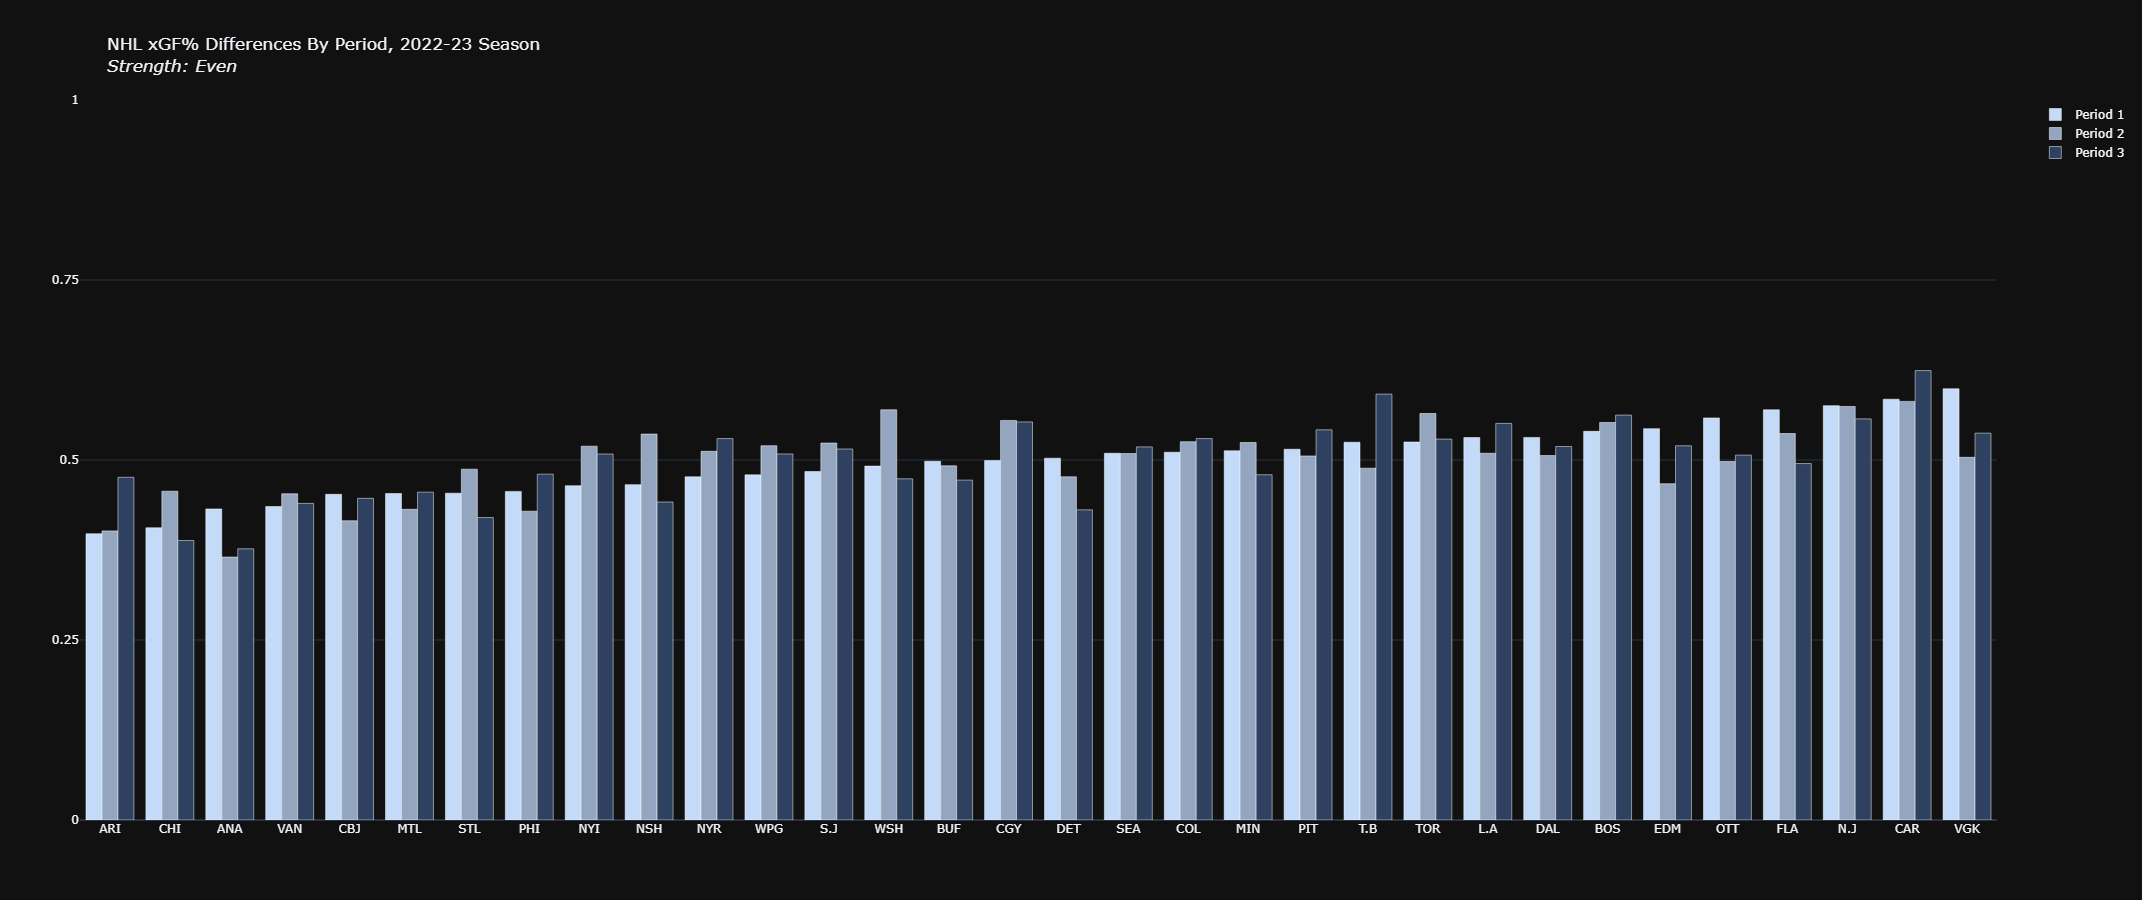

In [373]:
import plotly.express as px
import plotly.graph_objects as go
data4 = first_period_team_xg
data4 = data4.sort_values(by=['xGF%'])
data5 = second_period_team_xg
data5 = data5.sort_values(by=['xGF%'])
data6 = third_period_team_xg
data6 = data6.sort_values(by=['xGF%'])
colours = {
    "Period 1": "#0C3B5D",
    "Period 2": "#3EC1CD",
    "Period 3": "#EF3A4C",
}

'''
fig = px.bar(data3, x='xGF%', y='team',text=('xGF%_str'),
             hover_data=['team', 'xGF','xGA'],template="plotly_dark",
            )
'''
fig = go.Figure(data=[
    go.Bar(name='Period 1', x=data4['team'], y=data4['xGF%'],marker_color='#C4DAF9'),
    go.Bar(name='Period 2', x=data5['team'], y=data5['xGF%'],marker_color='#94A6BF'),
   go.Bar(name='Period 3', x=data6['team'], y=data6['xGF%'],marker_color='#2F4160')
])

fig.update_layout(
    barmode="group",
    title=("NHL xGF% Differences By Period, 2022-23 Season<br>" +
           "<i>Strength: Even</i>"),
    height=900,
    width=1800,
    template="plotly_dark",
    
)
fig.update_traces(marker_line_color='#FFFFFF',
                 marker_line_width=.5)
fig.update_yaxes(range=[0, 1])
fig.update_yaxes(tickvals=[0,.25,.5,.75,1])
fig.show()

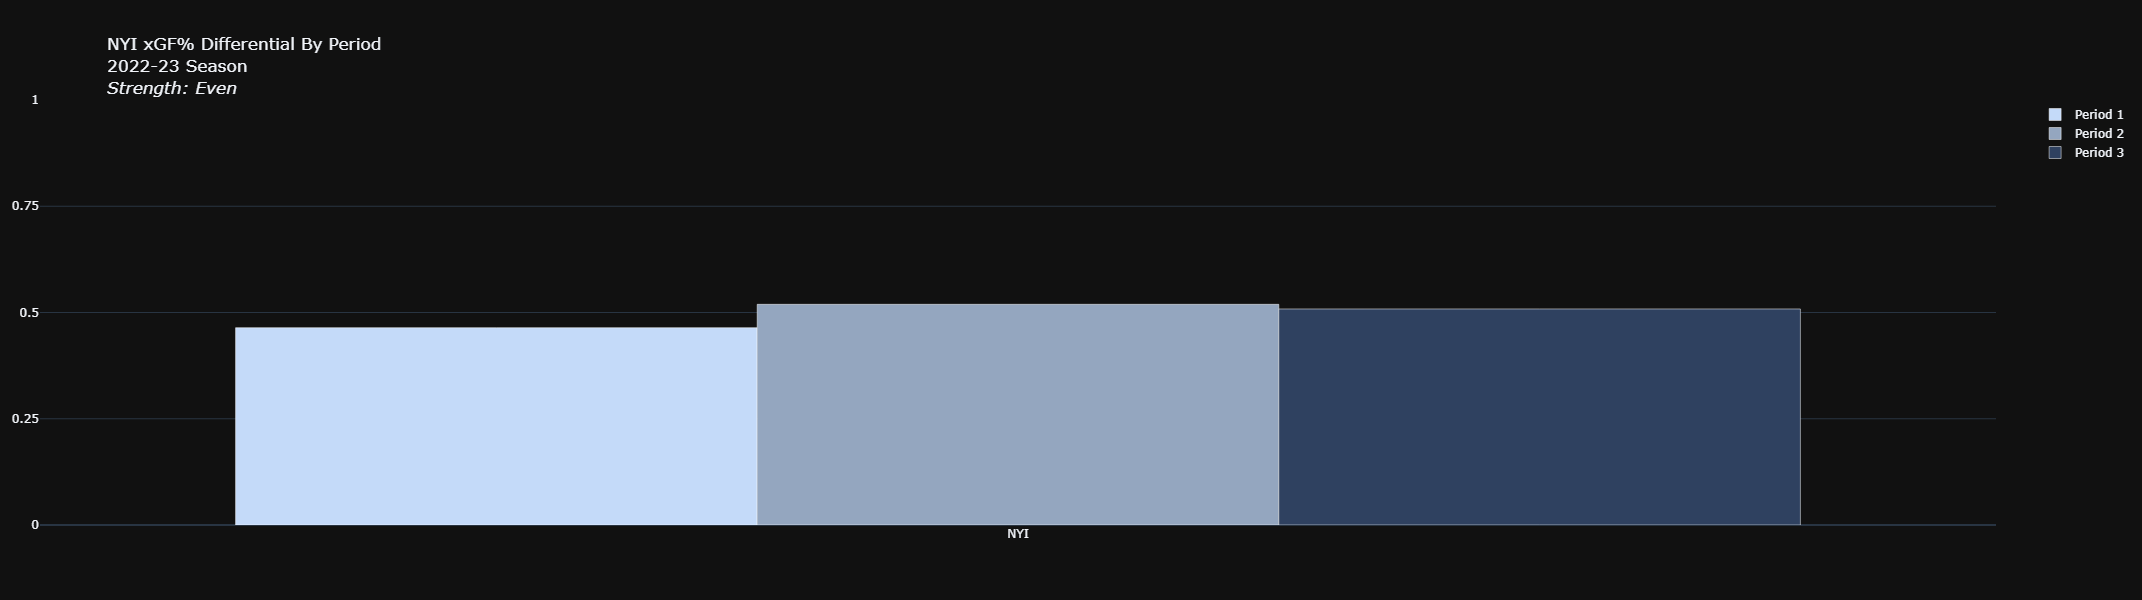

In [393]:
nyi_first = data4[data4['team']=='NYI']
nyi_second = data5[data5['team']=='NYI']
nyi_third = data6[data6['team']=='NYI']
import plotly.express as px
import plotly.graph_objects as go
colours = {
    "Period 1": "#0C3B5D",
    "Period 2": "#3EC1CD",
    "Period 3": "#EF3A4C",
}

'''
fig = px.bar(data3, x='xGF%', y='team',text=('xGF%_str'),
             hover_data=['team', 'xGF','xGA'],template="plotly_dark",
            )
'''
fig = go.Figure(data=[
    go.Bar(name='Period 1', x=nyi_first['team'], y=nyi_first['xGF%'],marker_color='#C4DAF9'),
    go.Bar(name='Period 2', x=nyi_second['team'], y=nyi_second['xGF%'],marker_color='#94A6BF'),
    go.Bar(name='Period 3', x=nyi_third['team'], y=nyi_third['xGF%'],marker_color='#2F4160')
])

fig.update_layout(
    barmode="group",
    title=("NYI xGF% Differential By Period<br>" +
           "2022-23 Season<br>" +
           "<i>Strength: Even</i>"),
    height=600,
    width=350,
    margin=dict(r=20, l=30, b=75, t=100),
    template="plotly_dark",
    
)
fig.update_traces(marker_line_color='#FFFFFF',
                 marker_line_width=.5)
fig.update_yaxes(range=[0, 1])
fig.update_yaxes(tickvals=[0,.25,.5,.75,1])
fig.show()

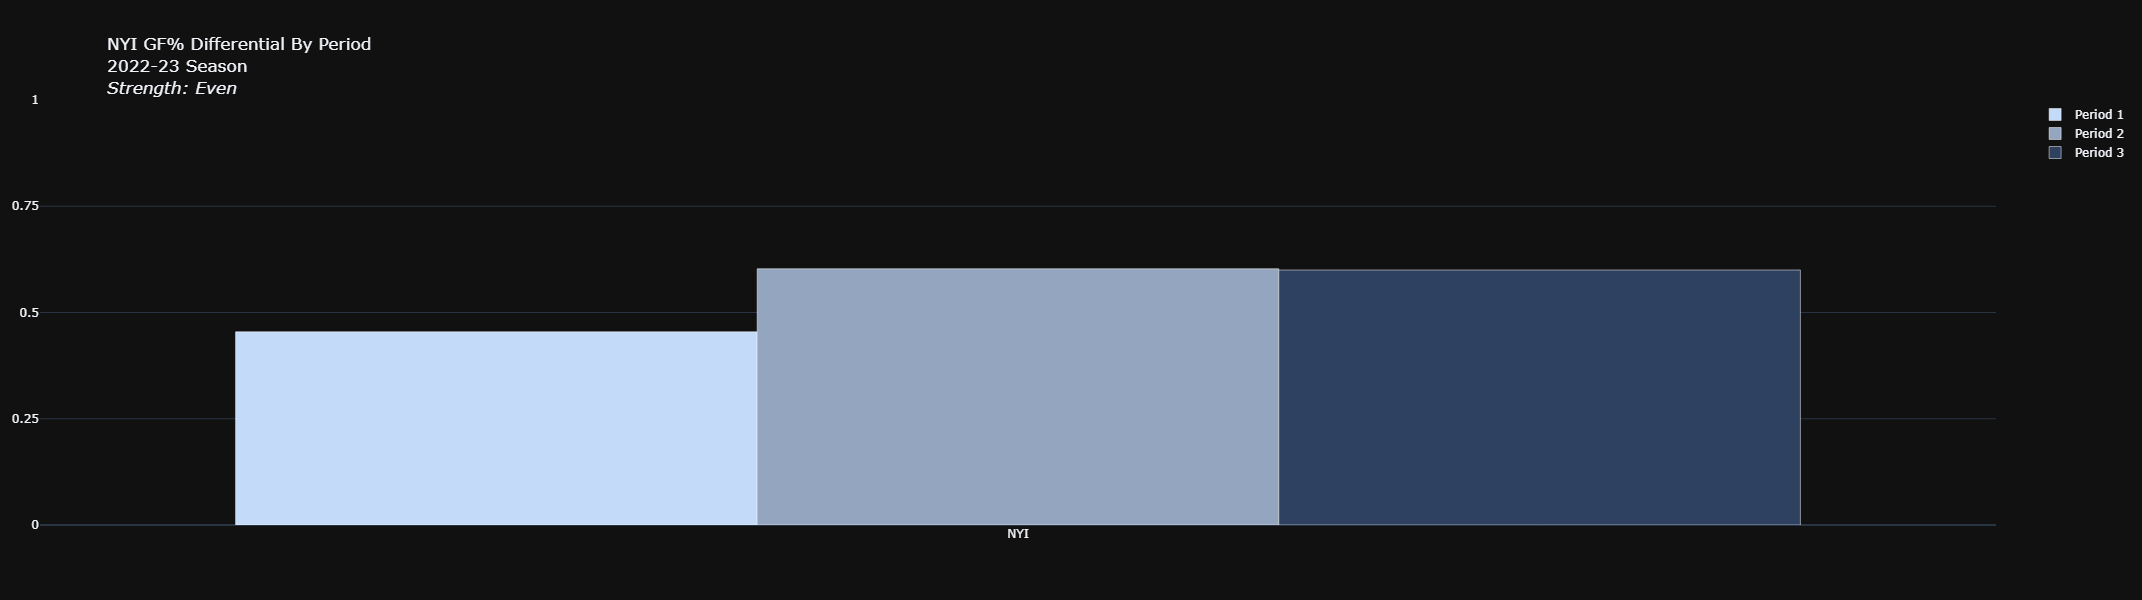

In [392]:
nyi_first = data4[data4['team']=='NYI']
nyi_second = data5[data5['team']=='NYI']
nyi_third = data6[data6['team']=='NYI']
import plotly.express as px
import plotly.graph_objects as go
colours = {
    "Period 1": "#0C3B5D",
    "Period 2": "#3EC1CD",
    "Period 3": "#EF3A4C",
}

'''
fig = px.bar(data3, x='GF%', y='team',text=('xGF%_str'),
             hover_data=['team', 'GF','GA'],template="plotly_dark",
            )
'''
fig = go.Figure(data=[
    go.Bar(name='Period 1', x=nyi_first['team'], y=nyi_first['GF%'],marker_color='#C4DAF9'),
    go.Bar(name='Period 2', x=nyi_second['team'], y=nyi_second['GF%'],marker_color='#94A6BF'),
    go.Bar(name='Period 3', x=nyi_third['team'], y=nyi_third['GF%'],marker_color='#2F4160')
])

fig.update_layout(
    barmode="group",
    title=("NYI GF% Differential By Period<br>" +
           "2022-23 Season<br>" +
           "<i>Strength: Even</i>"),
    height=600,
    width=350,
    margin=dict(r=20, l=30, b=75, t=100),
    template="plotly_dark",
    
)
fig.update_traces(marker_line_color='#FFFFFF',
                 marker_line_width=.5)
fig.update_yaxes(range=[0, 1])
fig.update_yaxes(tickvals=[0,.25,.5,.75,1])
fig.show()

In [1]:
import plotly.express as px
import plotly.graph_objects as go
data4 = first_period_team_xg
#data4 = data4.sort_values(by=['GF%'])
data5 = second_period_team_xg
data5 = data5.sort_values(by=['GF%'])
data6 = third_period_team_xg
data6 = data6.sort_values(by=['GF%'])
colours = {
    "Period 1": "#0C3B5D",
    "Period 2": "#3EC1CD",
    "Period 3": "#EF3A4C",
}

'''
fig = px.bar(data3, x='xGF%', y='team',text=('xGF%_str'),
             hover_data=['team', 'xGF','xGA'],template="plotly_dark",
            )
'''
fig = go.Figure(data=[
    go.Bar(name='Period 1', x=data4['team'], y=data4['GF%'],marker_color='#C4DAF9'),
    go.Bar(name='Period 2', x=data5['team'], y=data5['GF%'],marker_color='#94A6BF'),
   go.Bar(name='Period 3', x=data6['team'], y=data6['GF%'],marker_color='#2F4160')
])

fig.update_layout(
    barmode="group",
    title=("NHL GF% Differences By Period, 2022-23 Season<br>" +
           "<i>Strength: Even</i>"),
    height=900,
    width=1800,
    template="plotly_dark",
    
)
fig.update_traces(marker_line_color='#FFFFFF',
                 marker_line_width=.5)
fig.update_yaxes(range=[0, 1])
fig.update_yaxes(tickvals=[0,.25,.5,.75,1])
fig.show()

NameError: name 'first_period_team_xg' is not defined